Simple Naive Bayes classifier

In [531]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Setting background for plots
sns.set(style='darkgrid')


import numpy as np
import random
import re
import sklearn.datasets as skds
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

#%matplotlib inline
#from __future__ import division

#import matplotlib.pyplot as plt
#import numpy as np
#import pandas as pd
#import scipy.stats as stats
#import seaborn as sns

#from matplotlib import cm

# Setting background to plots
#sns.set(style="darkgrid")

----

In [427]:
corpi = {
    'original':'../data/corpus',
    'en':'../data/en_corpus',
    'de':'../data/de_corpus',
    'es':'../data/es_corpus',
    'fr':'../data/fr_corpus'
}

languages = ['en','de','es','fr']

**load_corpus**

Loads the entire experimental corpus and returns it as a bunch.
- _source_ source directory of the corpus
- _encoding_ encoding of the corpus.  Default is UTF-8.
- _languages_ languages to load from the corpus.  Default will load all.

In [428]:
def load_corpus(source="../data/corpus", encoding='UTF-8', languages=None):
    return skds.load_files(source, encoding=encoding, categories=languages, shuffle=True)

In [429]:
def test_load_corpus():
    corpus = load_corpus(languages=['en'])
    assert corpus.target_names[0] == 'en'
    
    corpus = load_corpus(languages=['de','es','fr'])
    print corpus.target_names
    assert len(corpus.target_names) == 3
    
    corpus = load_corpus()
    print corpus.target_names
    assert len(corpus.target_names) == 4
    
    
test_load_corpus()

['de', 'es', 'fr']
['de', 'en', 'es', 'fr']


**token_pattern**

Returns a token pattern for unicode alphabetical character words only.  No numbers or underscores allowed.8

In [458]:
def token_pattern():
    return '(?u)\\b[^\W_0-9]{2,}\\b'

In [495]:
def single_char_token_pattern():
    return '(?u)\\b[^\W_0-9]{1,}\\b'

----
**Background:  Data **

A total of 4,000 paragraphs were extracted from the Wikipedia articles at _X_ - 1,000 messages for each of four languages: English, German, Spanish and French. Paragraphs were identified by `<p>` tag blocks.  Each paragraph had any embedded HTML tags used for formatting purposes removed. Embedded anchor tags were removed and replaced with the word or phrase appearing between the `<a></a>` tags as this was often a legimate word or phrase in the source language and the anchor was simply there to facilitate connectivity between articles on related concepts.

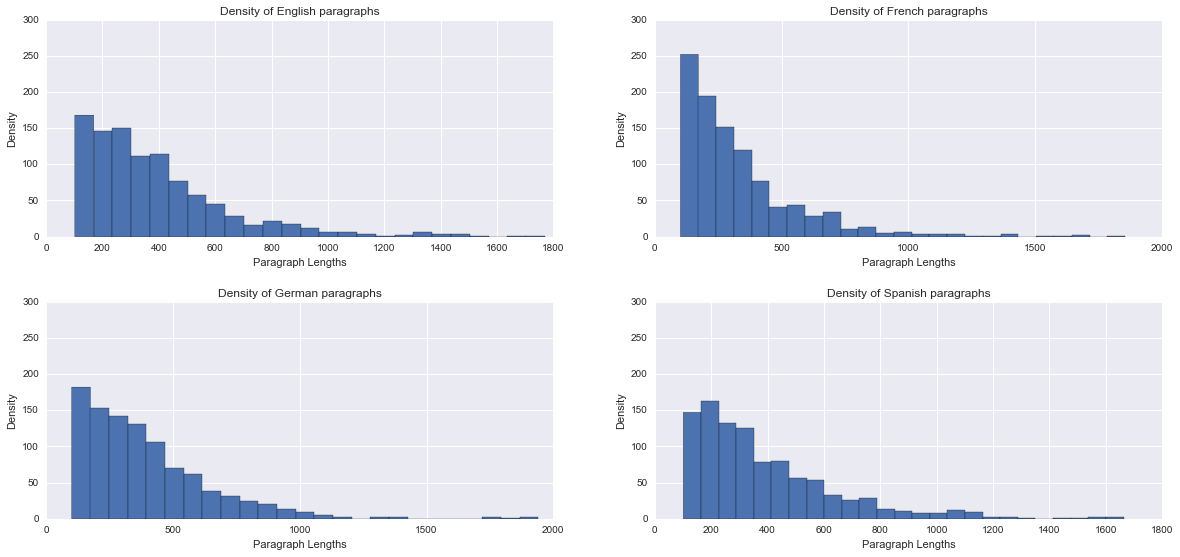

In [431]:
# Plot a histogram of the English message data
en_lengths = [len(p) for p in load_corpus(languages=['en']).data]
fr_lengths = [len(p) for p in load_corpus(languages=['fr']).data]
de_lengths = [len(p) for p in load_corpus(languages=['de']).data]
es_lengths = [len(p) for p in load_corpus(languages=['es']).data]

bins = 25
y = [0, 300]
figure = plt.figure(figsize=(20,14))
axes = figure.add_subplot(3,2,1)
axes.hist(en_lengths, bins=bins)
axes.set_title("Density of English paragraphs")
axes.set_ylabel("Density")
axes.set_xlabel("Paragraph Lengths")
axes.set_ylim(y)

axes = figure.add_subplot(3,2,2)
axes.hist(fr_lengths, bins=bins)
axes.set_title("Density of French paragraphs")
axes.set_ylabel("Density")
axes.set_xlabel("Paragraph Lengths")
axes.set_ylim(y)

axes = figure.add_subplot(3,2,3)
axes.hist(de_lengths, bins=bins)
axes.set_title("Density of German paragraphs")
axes.set_ylabel("Density")
axes.set_xlabel("Paragraph Lengths")
axes.set_ylim(y)

axes = figure.add_subplot(3,2,4)
axes.hist(es_lengths, bins=bins)
axes.set_title("Density of Spanish paragraphs")
axes.set_ylabel("Density")
axes.set_xlabel("Paragraph Lengths")
axes.set_ylim(y)

# Improved spacing between plots
figure.subplots_adjust(hspace=.3)

# Show the plots
plt.show()

English, German and Spanish paragraph lengths followed comparable distributions though smaller French paragraphs (<= 200 characters) are over-represented.  This is tolerable in the raw corpus as the individual experiments focus on sub-sampling messages over known distributions to produce test, training & validation sets that are balanced across and within the individual language classes.

#### TODO:  Unique term analysis


In [ ]:
def run_experiment

**Experiment 0:**  Simple top-N feature selection*

We'll begin with a baseline experiment to determine classifier performance when selecting features (words & word n-grams) across a random sub-sample of the language to classify and its counter-examples.  This is just to give us a baseline.  We'll use the simplest vectorizer in sklearn and 2 types of classifiers:  Naive Bayes & SVM.
- Sample size of 10% across the whole corpus for constructing word features
- Word features are identified as follows:
    - alpha only (no numeric characters)
    - 2 character minimum length
- Top N word features are selected where N in [1,30]. Top words are selected based on their total count across the 10% sample corpus
- Classifiers used were NaiveBayes & SVM with a Linear Kernel
    - Naive Bayes w/ default configuration (alpha = 1,  Laplace smoothing), fit_prior = True
    - SVM w/ RBF & C=1, default RBF gamma?
- 10-fold CrossValidation run, reporting the mean _test_ metrics for Accuracy, F1 score & AUC.
    
First series of tests were run using the original corpus of 4 languages:  en, fr, de, es

----------------------------------
----------------------------------
Starting experiments for language en
----------------------------------
Results for (lang: en, features: 1)
Features selected: [u'de']
Naive Bayes:
	Accuracy 0.75, +\/-95%CI 0.0
	F1 0.857142857143, +\/-95%CI 0.0
	auc 0.5, +\-95%CI 0.0
SVM:
	Accuracy 0.75, +\/-95%CI 0.0
	F1 0.857142857143, +\/-95%CI 0.0
	auc 0.616746666667, +\-95%CI 0.0813539602259
----------------------------------
Results for (lang: en, features: 2)
Features selected: [u'de', u'la']
Naive Bayes:
	Accuracy 0.72875, +\/-95%CI 0.0167705098312
	F1 0.84306759104, +\/-95%CI 0.0111868315752
	auc 0.588323333333, +\-95%CI 0.0451233253306
SVM:
	Accuracy 0.75, +\/-95%CI 0.0
	F1 0.857142857143, +\/-95%CI 0.0
	auc 0.808268333333, +\-95%CI 0.0360624441459
----------------------------------
Results for (lang: en, features: 3)
Features selected: [u'de', u'la', u'the']
Naive Bayes:
	Accuracy 0.978, +\/-95%CI 0.0126095202129
	F1 0.98537245418, +\/-95%CI 0.00837639128

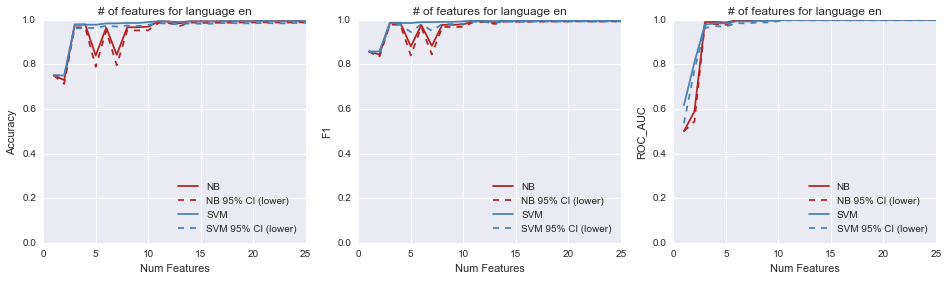

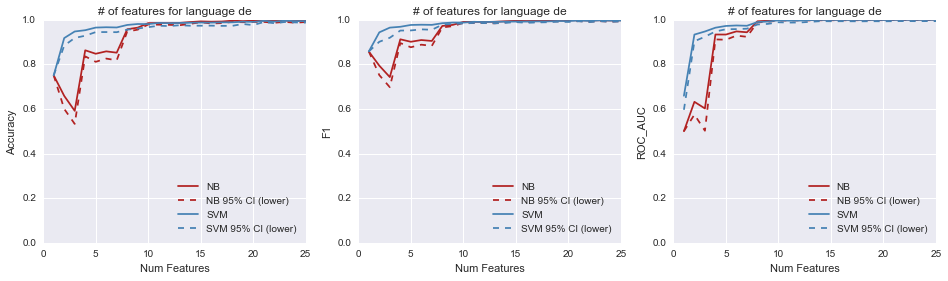

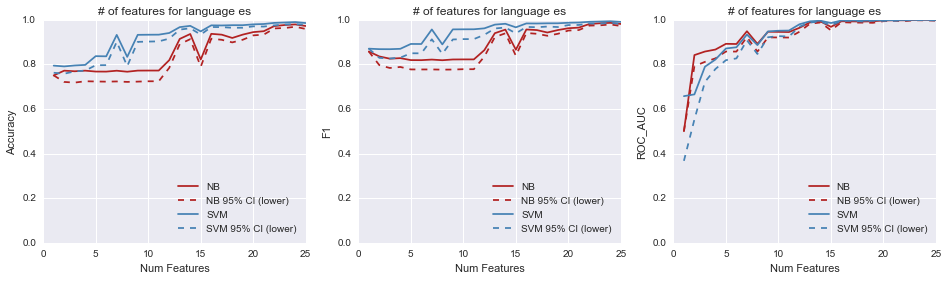

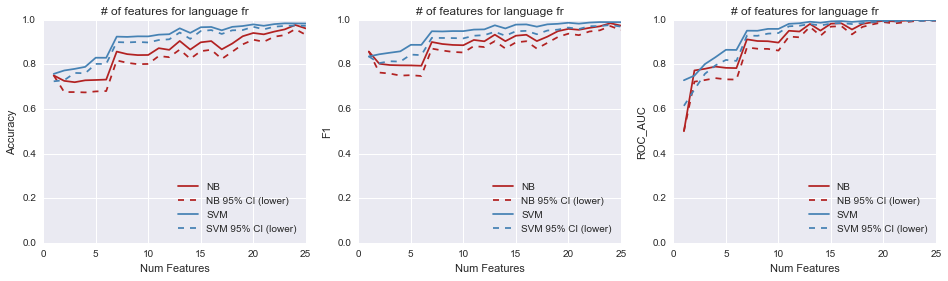

In [484]:
random.seed(123454321)
np.random.seed(123454321)

def experiment_0(corpi, language, num_features, feature_sampling_perc=.10):
    
    # Get the feature sampling corpus.  We'll sample from all languages here.
    fs_corpus = skds.load_files(corpi['original'], encoding='UTF-8', shuffle=True)
    
    # Discover features by count
    sub_sample = train_test_split(fs_corpus.data, fs_corpus.target, train_size=feature_sampling_perc)[0]
    vectorizer = CountVectorizer(analyzer='word', lowercase=True, encoding='UTF-8',
                                   max_features=num_features, token_pattern=token_pattern())
    vectorizer.fit(sub_sample)
    
    # Load the language corpus & fit a Naive Bayes classifier
    corpus = skds.load_files(corpi[language], encoding='UTF-8', shuffle=True)
    X = vectorizer.transform(corpus.data)
    y = corpus.target
    
    # Fit and evaluate a Naive Bayes Classifier
    classifier = MultinomialNB(fit_prior=True)
    scoring = ['accuracy','f1','roc_auc']
    nb_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
    
    # Fit and evaluate an SVM
    classifier = svm.SVC(kernel='rbf', C=1)
    svm_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
    
    # kernel=rbf (default)
    # decision function shape = ovo ( one-vs-rest) - original decision function in libsvm
    #  tol is the default 1e-3
    # default C = 1
    return {
        'num_features' : num_features,
        'features': vectorizer.get_feature_names(),
        'NB' : {
            'accuracy' : nb_results['test_accuracy'].mean(),
            'accuracy_95CI': nb_results['test_accuracy'].std() * 2,
            'f1' : nb_results['test_f1'].mean(),
            'f1_95CI': nb_results['test_f1'].std() * 2,
            'auc' : nb_results['test_roc_auc'].mean(),
            'auc_95CI': nb_results['test_roc_auc'].std() * 2
        },
        'SVM' : {
            'accuracy': svm_results['test_accuracy'].mean(),
            'accuracy_95CI' : svm_results['test_accuracy'].std() * 2,
            'f1': svm_results['test_f1'].mean(),
            'f1_95CI': svm_results['test_f1'].std() * 2,
            'auc': svm_results['test_roc_auc'].mean(),
            'auc_95CI': svm_results['test_roc_auc'].std() * 2
        }
    }



for language in languages:
    
    # Run tests for a language
    print "----------------------------------"
    print "----------------------------------"
    print "Starting experiments for language {0}".format(language)
    results = []
    for num_features in range(1, 25+1):
        exp_res = experiment_0(corpi, language, num_features)

        print "----------------------------------"
        print "Results for (lang: {0}, features: {1})".format(language, exp_res['num_features'])
        print "Features selected: {0}".format(exp_res['features'])
        print "Naive Bayes:"
        print "\tAccuracy {0}, +\/-95%CI {1}".format(exp_res['NB']['accuracy'], exp_res['NB']['accuracy_95CI'])
        print "\tF1 {0}, +\/-95%CI {1}".format(exp_res['NB']['f1'], exp_res['NB']['f1_95CI'])
        print "\tauc {0}, +\-95%CI {1}".format(exp_res['NB']['auc'],exp_res['NB']['auc_95CI'] )
        print "SVM:"
        print "\tAccuracy {0}, +\/-95%CI {1}".format(exp_res['SVM']['accuracy'], exp_res['SVM']['accuracy_95CI'])
        print "\tF1 {0}, +\/-95%CI {1}".format(exp_res['SVM']['f1'], exp_res['SVM']['f1_95CI'])
        print "\tauc {0}, +\-95%CI {1}".format(exp_res['SVM']['auc'],exp_res['SVM']['auc_95CI'] )
        results.append(exp_res)
            
    # Plotting NB
    figure = plt.figure(figsize=(16,4))
    nf = [result['num_features'] for result in results]
    
    # Accuracy on NB, SVM
    axes = figure.add_subplot(1,3,1)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_acc = [result['NB']['accuracy'] for result in results]
    nb_acc_lower = [result['NB']['accuracy'] - result['NB']['accuracy_95CI'] for result in results]
    h1, = axes.plot(nf, nb_acc, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_acc_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_acc = [result['SVM']['accuracy'] for result in results]
    svm_acc_lower = [result['SVM']['accuracy'] - result['SVM']['accuracy_95CI'] for result in results]
    h3, = axes.plot(nf, svm_acc, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_acc_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2,h3, h4], loc='lower right')
    axes.set_ylabel("Accuracy")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])

    # F1 on NB, SVM
    axes = figure.add_subplot(1,3,2)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_f1 = [result['NB']['f1'] for result in results]
    nb_f1_lower = [result['NB']['f1'] - result['NB']['f1_95CI'] for result in results]
    h1, = axes.plot(nf, nb_f1, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_f1_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_f1 =[result['SVM']['f1'] for result in results]
    svm_f1_lower = [result['SVM']['f1'] - result['NB']['f1_95CI'] for result in results]
    h3, = axes.plot(nf, svm_f1, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_f1_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2, h3, h4], loc='lower right')
    axes.set_ylabel("F1")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])
    
    # AUC on NB, SVM
    axes = figure.add_subplot(1,3,3)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_auc = [result['NB']['auc'] for result in results]
    nb_auc_lower = [result['NB']['auc'] - result['NB']['auc_95CI'] for result in results]
    h1, = axes.plot(nf, nb_auc, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_auc_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_auc = [result['SVM']['auc'] for result in results]
    svm_auc_lower = [result['SVM']['auc'] - result['SVM']['auc_95CI'] for result in results]
    h3, = axes.plot(nf, svm_auc, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_auc_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2, h3, h4], loc='lower right')
    axes.set_ylabel("ROC_AUC")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])

    
    print "Finished experiments for language {0}".format(language)

------
**Experiment 1: Feature selection by language**
Considering the results using features extracted from the general codebase, we've just built a feature space with the hope that the individual categories (languages) differentiate within those top-N categories.  As we saw, it took **X**  features before any real discrimintaory power showed up. 

Now we'll investigate the selection of features by language, rather than training each language classifier on the same feature set. 

Parameters for this test are:
- Sample size of 10% across the _language_ corpus for constructing word features
- Word features identified as follows:
    - alpha only (no numeric characters)
    - 2 character minimum length
- Top N word features are selected where N in [1,30].  Top words are selected based on their count within the language corpus sample
- Classifiers used were NaiveBayes & SVM:
    - Naive Bayes w/ default configuration:  alpha=1 (Laplace smoothing),  fit_prior=True
    - SVM w/ RBF & C=1, default RBF gamma?
- 10-fold Cross Validation run, reporting the mean test metrics for Accuracy, F1 Score & AUC

**Experiment 1**: Single language classification using source language, simple CountVectorizer.

----------------------------------
----------------------------------
Starting experiments for language en
----------------------------------
Results for (lang: en, features: 1)
Features selected: [u'the']
Naive Bayes:
	Accuracy 0.75, +\/-95%CI 0.0
	F1 0.857142857143, +\/-95%CI 0.0
	auc 0.5, +\-95%CI 0.0
SVM:
	Accuracy 0.9635, +\/-95%CI 0.0150332963784
	F1 0.975463990759, +\/-95%CI 0.0101277010381
	auc 0.95687, +\-95%CI 0.0193546422798
----------------------------------
Results for (lang: en, features: 2)
Features selected: [u'in', u'the']
Naive Bayes:
	Accuracy 0.9345, +\/-95%CI 0.0137477270849
	F1 0.957151662855, +\/-95%CI 0.00888519302809
	auc 0.896315, +\-95%CI 0.0312159697377
SVM:
	Accuracy 0.967, +\/-95%CI 0.0188148877222
	F1 0.978142038941, +\/-95%CI 0.0124100972785
	auc 0.969798333333, +\-95%CI 0.0234770405574
----------------------------------
Results for (lang: en, features: 3)
Features selected: [u'in', u'of', u'the']
Naive Bayes:
	Accuracy 0.93575, +\/-95%CI 0.0137931142241

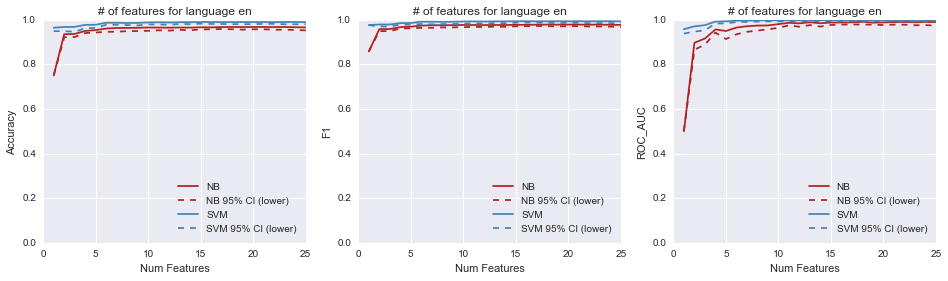

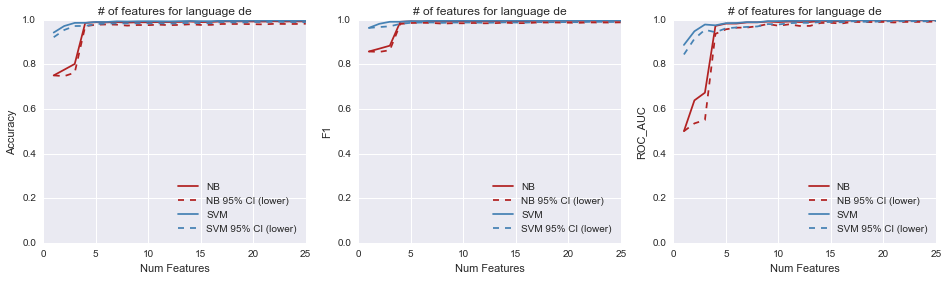

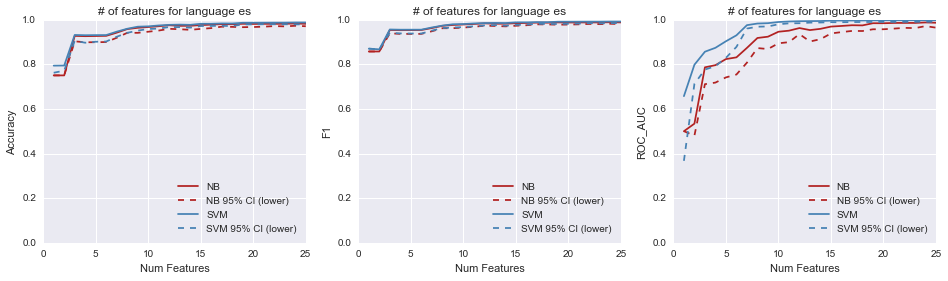

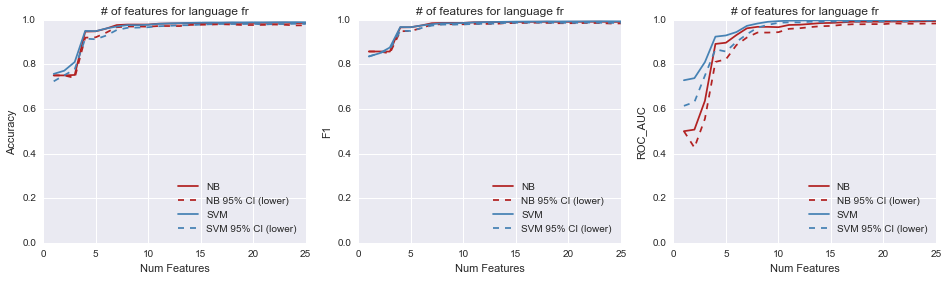

In [486]:
def experiment_1(corpi, language, num_features, feature_sampling_perc=.10):
    
    # Get the feature sampling corpus. Categories has to be restricted to the language of interest
    fs_corpus = skds.load_files(corpi[language], encoding='UTF-8', shuffle=True, categories=[language])
    
    # Discover features by count
    sub_sample = train_test_split(fs_corpus.data, fs_corpus.target, train_size=feature_sampling_perc)[0]
    vectorizer = CountVectorizer(analyzer='word', lowercase=True, encoding='UTF-8',
                                   max_features=num_features, token_pattern=token_pattern())
    vectorizer.fit(sub_sample)
    
    # Load the language corpus & fit a Naive Bayes classifier
    corpus = skds.load_files(corpi[language], encoding='UTF-8', shuffle=True)
    X = vectorizer.transform(corpus.data)
    y = corpus.target
    
    # Fit and evaluate a Naive Bayes Classifier
    classifier = MultinomialNB(fit_prior=True)
    scoring = ['accuracy','f1','roc_auc']
    nb_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
    
    # Fit and evaluate an SVM
    classifier = svm.SVC(kernel='rbf', C=1)
    svm_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
    
    # kernel=rbf (default)
    # decision function shape = ovo ( one-vs-rest) - original decision function in libsvm
    #  tol is the default 1e-3
    # default C = 1
    return {
        'num_features' : num_features,
        'features': vectorizer.get_feature_names(),
        'NB' : {
            'accuracy' : nb_results['test_accuracy'].mean(),
            'accuracy_95CI': nb_results['test_accuracy'].std() * 2,
            'f1' : nb_results['test_f1'].mean(),
            'f1_95CI': nb_results['test_f1'].std() * 2,
            'auc' : nb_results['test_roc_auc'].mean(),
            'auc_95CI': nb_results['test_roc_auc'].std() * 2
        },
        'SVM' : {
            'accuracy': svm_results['test_accuracy'].mean(),
            'accuracy_95CI' : svm_results['test_accuracy'].std() * 2,
            'f1': svm_results['test_f1'].mean(),
            'f1_95CI': svm_results['test_f1'].std() * 2,
            'auc': svm_results['test_roc_auc'].mean(),
            'auc_95CI': svm_results['test_roc_auc'].std() * 2
        }
    }


for language in languages:
    
    # Run tests for a language
    print "----------------------------------"
    print "----------------------------------"
    print "Starting experiments for language {0}".format(language)
    results = []
    for num_features in range(1, 25+1):
        exp_res = experiment_1(corpi, language, num_features)
        print "----------------------------------"
        print "Results for (lang: {0}, features: {1})".format(language, exp_res['num_features'])
        print "Features selected: {0}".format(exp_res['features'])
        print "Naive Bayes:"
        print "\tAccuracy {0}, +\/-95%CI {1}".format(exp_res['NB']['accuracy'], exp_res['NB']['accuracy_95CI'])
        print "\tF1 {0}, +\/-95%CI {1}".format(exp_res['NB']['f1'], exp_res['NB']['f1_95CI'])
        print "\tauc {0}, +\-95%CI {1}".format(exp_res['NB']['auc'],exp_res['NB']['auc_95CI'] )
        print "SVM:"
        print "\tAccuracy {0}, +\/-95%CI {1}".format(exp_res['SVM']['accuracy'], exp_res['SVM']['accuracy_95CI'])
        print "\tF1 {0}, +\/-95%CI {1}".format(exp_res['SVM']['f1'], exp_res['SVM']['f1_95CI'])
        print "\tauc {0}, +\-95%CI {1}".format(exp_res['SVM']['auc'],exp_res['SVM']['auc_95CI'] )
        results.append(exp_res)
            
    # Plotting NB
    figure = plt.figure(figsize=(16,4))
    nf = [result['num_features'] for result in results]
    
    # Accuracy on NB, SVM
    axes = figure.add_subplot(1,3,1)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_acc = [result['NB']['accuracy'] for result in results]
    nb_acc_lower = [result['NB']['accuracy'] - result['NB']['accuracy_95CI'] for result in results]
    h1, = axes.plot(nf, nb_acc, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_acc_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_acc = [result['SVM']['accuracy'] for result in results]
    svm_acc_lower = [result['SVM']['accuracy'] - result['SVM']['accuracy_95CI'] for result in results]
    h3, = axes.plot(nf, svm_acc, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_acc_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2,h3, h4], loc='lower right')
    axes.set_ylabel("Accuracy")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])

    # F1 on NB, SVM
    axes = figure.add_subplot(1,3,2)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_f1 = [result['NB']['f1'] for result in results]
    nb_f1_lower = [result['NB']['f1'] - result['NB']['f1_95CI'] for result in results]
    h1, = axes.plot(nf, nb_f1, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_f1_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_f1 =[result['SVM']['f1'] for result in results]
    svm_f1_lower = [result['SVM']['f1'] - result['NB']['f1_95CI'] for result in results]
    h3, = axes.plot(nf, svm_f1, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_f1_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2, h3, h4], loc='lower right')
    axes.set_ylabel("F1")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])
    
    # AUC on NB, SVM
    axes = figure.add_subplot(1,3,3)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_auc = [result['NB']['auc'] for result in results]
    nb_auc_lower = [result['NB']['auc'] - result['NB']['auc_95CI'] for result in results]
    h1, = axes.plot(nf, nb_auc, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_auc_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_auc = [result['SVM']['auc'] for result in results]
    svm_auc_lower = [result['SVM']['auc'] - result['SVM']['auc_95CI'] for result in results]
    h3, = axes.plot(nf, svm_auc, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_auc_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2, h3, h4], loc='lower right')
    axes.set_ylabel("ROC_AUC")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])

    
    print "Finished experiments for language {0}".format(language)

---

**Experiment 2: Feature selection by language, Top-N by frequency**

Focusing on language specific sampling for classification features appears to have improved things (why?), perhaps by selecting features relevant to that language's lexicon.

Within the corpus itself, we can consider looking at the feature frequency. For each document, how often does an individual term appear within the document?  

Parameters for this test are:
- Sample size of 10% from the language corpus for identifying word features
- Word features identified as follows:
    - alpha only (no numeric characters)
    - 2 character minimum length
- Top N word features are selected where N in [1,30].  Top words are selected based on their frequency within the language corpus sample.  Use_idf=False
- Classifiers used were Naive Bayes & SVM
    - Naive Bayes w/ default configuration:  alpha=1 (Laplace smoothing),  fit_prior=True
    - SVM w/ RBF & C=1, default RBF gamma
- 10-fold Cross Validation run, reporting the mean test statistics for Accuracy, F1 & AUC

----------------------------------
----------------------------------
Starting experiments for language en
----------------------------------
Results for (lang: en, features: 1)
Features selected: [u'the']
Naive Bayes:
	Accuracy 0.75, +\/-95%CI 0.0
	F1 0.857142857143, +\/-95%CI 0.0
	auc 0.5, +\-95%CI 0.0
SVM:
	Accuracy 0.9635, +\/-95%CI 0.0150332963784
	F1 0.975463990759, +\/-95%CI 0.0101277010381
	auc 0.959333333333, +\-95%CI 0.0195618676682
----------------------------------
Results for (lang: en, features: 2)
Features selected: [u'in', u'the']
Naive Bayes:
	Accuracy 0.875, +\/-95%CI 0.0234520787991
	F1 0.921385720448, +\/-95%CI 0.0127365016309
	auc 0.887016666667, +\-95%CI 0.0331838715845
SVM:
	Accuracy 0.96275, +\/-95%CI 0.0157241851935
	F1 0.974987881912, +\/-95%CI 0.0105953486354
	auc 0.971695, +\-95%CI 0.0246584763429
----------------------------------
Results for (lang: en, features: 3)
Features selected: [u'in', u'of', u'the']
Naive Bayes:
	Accuracy 0.89375, +\/-95%CI 0.022830

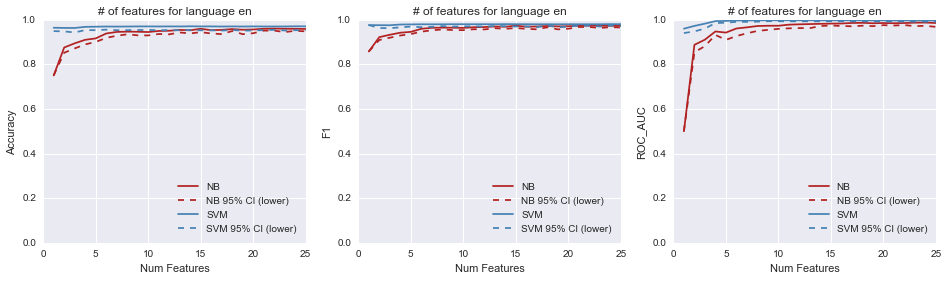

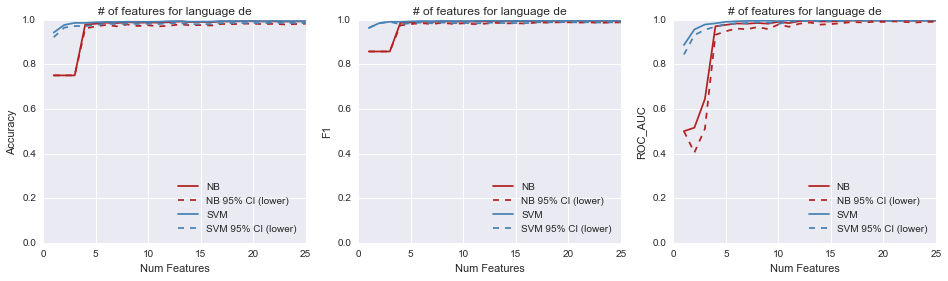

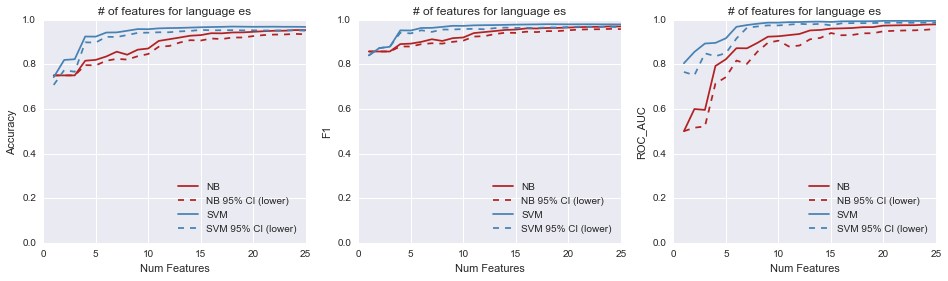

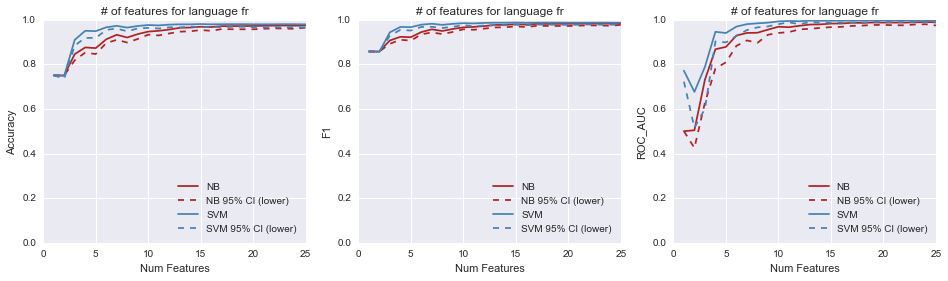

In [487]:
def experiment_2(corpi, language, num_features, feature_sampling_perc=.10):
    
    # Get the feature sampling corpus. Categories has to be restricted to the language of interest
    fs_corpus = skds.load_files(corpi[language], encoding='UTF-8', shuffle=True, categories=[language])
    
    # Discover features by count
    sub_sample = train_test_split(fs_corpus.data, fs_corpus.target, train_size=feature_sampling_perc)[0]
    vectorizer = TfidfVectorizer(analyzer='word', lowercase=True, encoding='UTF-8', use_idf=False,
                                   max_features=num_features, token_pattern=token_pattern())
    vectorizer.fit(sub_sample)
    
    # Load the language corpus & fit a Naive Bayes classifier
    corpus = skds.load_files(corpi[language], encoding='UTF-8', shuffle=True)
    X = vectorizer.transform(corpus.data)
    y = corpus.target
    
    # Fit and evaluate a Naive Bayes Classifier
    classifier = MultinomialNB(fit_prior=True)
    scoring = ['accuracy','f1','roc_auc']
    nb_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
    
    # Fit and evaluate an SVM
    classifier = svm.SVC(kernel='rbf', C=1)
    svm_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
    
    # kernel=rbf (default)
    # decision function shape = ovo ( one-vs-rest) - original decision function in libsvm
    #  tol is the default 1e-3
    # default C = 1
    return {
        'num_features' : num_features,
        'features': vectorizer.get_feature_names(),
        'NB' : {
            'accuracy' : nb_results['test_accuracy'].mean(),
            'accuracy_95CI': nb_results['test_accuracy'].std() * 2,
            'f1' : nb_results['test_f1'].mean(),
            'f1_95CI': nb_results['test_f1'].std() * 2,
            'auc' : nb_results['test_roc_auc'].mean(),
            'auc_95CI': nb_results['test_roc_auc'].std() * 2
        },
        'SVM' : {
            'accuracy': svm_results['test_accuracy'].mean(),
            'accuracy_95CI' : svm_results['test_accuracy'].std() * 2,
            'f1': svm_results['test_f1'].mean(),
            'f1_95CI': svm_results['test_f1'].std() * 2,
            'auc': svm_results['test_roc_auc'].mean(),
            'auc_95CI': svm_results['test_roc_auc'].std() * 2
        }
    }


for language in languages:
    
    # Run tests for a language
    print "----------------------------------"
    print "----------------------------------"
    print "Starting experiments for language {0}".format(language)
    results = []
    for num_features in range(1, 25+1):
        exp_res = experiment_2(corpi, language, num_features)
        print "----------------------------------"
        print "Results for (lang: {0}, features: {1})".format(language, exp_res['num_features'])
        print "Features selected: {0}".format(exp_res['features'])
        print "Naive Bayes:"
        print "\tAccuracy {0}, +\/-95%CI {1}".format(exp_res['NB']['accuracy'], exp_res['NB']['accuracy_95CI'])
        print "\tF1 {0}, +\/-95%CI {1}".format(exp_res['NB']['f1'], exp_res['NB']['f1_95CI'])
        print "\tauc {0}, +\-95%CI {1}".format(exp_res['NB']['auc'],exp_res['NB']['auc_95CI'] )
        print "SVM:"
        print "\tAccuracy {0}, +\/-95%CI {1}".format(exp_res['SVM']['accuracy'], exp_res['SVM']['accuracy_95CI'])
        print "\tF1 {0}, +\/-95%CI {1}".format(exp_res['SVM']['f1'], exp_res['SVM']['f1_95CI'])
        print "\tauc {0}, +\-95%CI {1}".format(exp_res['SVM']['auc'],exp_res['SVM']['auc_95CI'] )
        results.append(exp_res)
            
    # Plotting NB
    figure = plt.figure(figsize=(16,4))
    nf = [result['num_features'] for result in results]
    
    # Accuracy on NB, SVM
    axes = figure.add_subplot(1,3,1)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_acc = [result['NB']['accuracy'] for result in results]
    nb_acc_lower = [result['NB']['accuracy'] - result['NB']['accuracy_95CI'] for result in results]
    h1, = axes.plot(nf, nb_acc, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_acc_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_acc = [result['SVM']['accuracy'] for result in results]
    svm_acc_lower = [result['SVM']['accuracy'] - result['SVM']['accuracy_95CI'] for result in results]
    h3, = axes.plot(nf, svm_acc, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_acc_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2,h3, h4], loc='lower right')
    axes.set_ylabel("Accuracy")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])

    # F1 on NB, SVM
    axes = figure.add_subplot(1,3,2)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_f1 = [result['NB']['f1'] for result in results]
    nb_f1_lower = [result['NB']['f1'] - result['NB']['f1_95CI'] for result in results]
    h1, = axes.plot(nf, nb_f1, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_f1_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_f1 =[result['SVM']['f1'] for result in results]
    svm_f1_lower = [result['SVM']['f1'] - result['NB']['f1_95CI'] for result in results]
    h3, = axes.plot(nf, svm_f1, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_f1_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2, h3, h4], loc='lower right')
    axes.set_ylabel("F1")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])
    
    # AUC on NB, SVM
    axes = figure.add_subplot(1,3,3)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_auc = [result['NB']['auc'] for result in results]
    nb_auc_lower = [result['NB']['auc'] - result['NB']['auc_95CI'] for result in results]
    h1, = axes.plot(nf, nb_auc, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_auc_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_auc = [result['SVM']['auc'] for result in results]
    svm_auc_lower = [result['SVM']['auc'] - result['SVM']['auc_95CI'] for result in results]
    h3, = axes.plot(nf, svm_auc, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_auc_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2, h3, h4], loc='lower right')
    axes.set_ylabel("ROC_AUC")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])

    
    print "Finished experiments for language {0}".format(language)

----

**Experiment 3: Feature selection by language, Binary features (word is present or not)**

Focusing on language specific sampling for classification features appears to have improved things (why?), perhaps by selecting features relevant to that language's lexicon.

Within the corpus itself, we can consider looking at the feature frequency. For each document, how often does an individual term appear within the document?  

Parameters for this test are:
- Sample size of 10% from the language corpus for identifying word features
- Word features identified as follows:
    - alpha only (no numeric characters)
    - 2 character minimum length
- Top N word features are selected where N in [1,30].  Top words are selected based on their total counts and modeled as binary indicators
- Classifiers used were Naive Bayes & SVM
    - Naive Bayes w/ default configuration:  alpha=1 (Laplace smoothing),  fit_prior=True
    - SVM w/ RBF & C=1, default RBF gamma
- 10-fold Cross Validation run, reporting the mean test statistics for Accuracy, F1 & AUC

----------------------------------
----------------------------------
Starting experiments for language en
----------------------------------
Results for (lang: en, features: 1)
Features selected: [u'the']
Naive Bayes:
	Accuracy 0.75, +\/-95%CI 0.0
	F1 0.857142857143, +\/-95%CI 0.0
	auc 0.5, +\-95%CI 0.0
SVM:
	Accuracy 0.9635, +\/-95%CI 0.0150332963784
	F1 0.975463990759, +\/-95%CI 0.0101277010381
	auc 0.959333333333, +\-95%CI 0.0195618676682
----------------------------------
Results for (lang: en, features: 2)
Features selected: [u'in', u'the']
Naive Bayes:
	Accuracy 0.77775, +\/-95%CI 0.019551214796
	F1 0.868379967416, +\/-95%CI 0.0102059756087
	auc 0.941863333333, +\-95%CI 0.0228091833358
SVM:
	Accuracy 0.9635, +\/-95%CI 0.0150332963784
	F1 0.975463990759, +\/-95%CI 0.0101277010381
	auc 0.957453333333, +\-95%CI 0.0207802994311
----------------------------------
Results for (lang: en, features: 3)
Features selected: [u'and', u'in', u'the']
Naive Bayes:
	Accuracy 0.9275, +\/-95%CI 0.

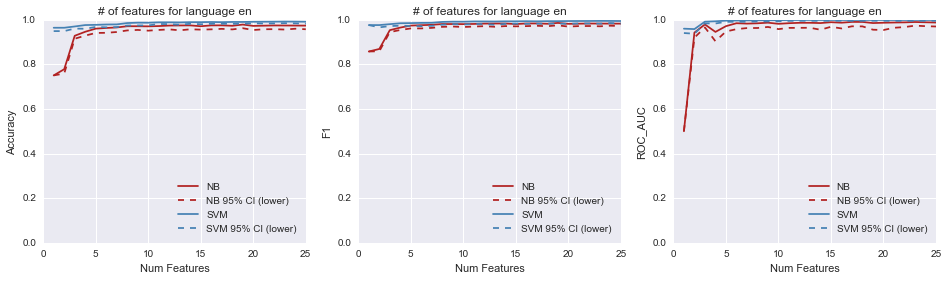

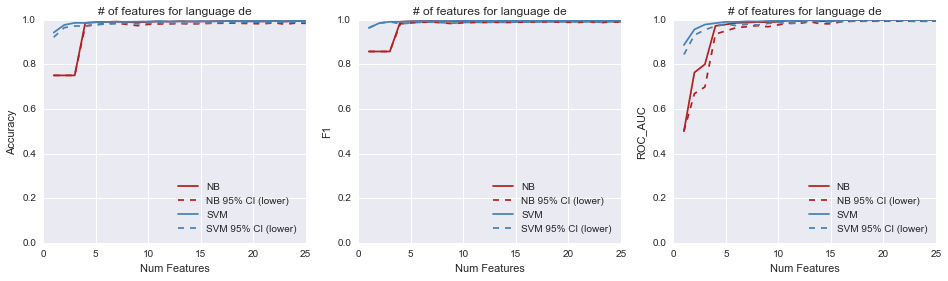

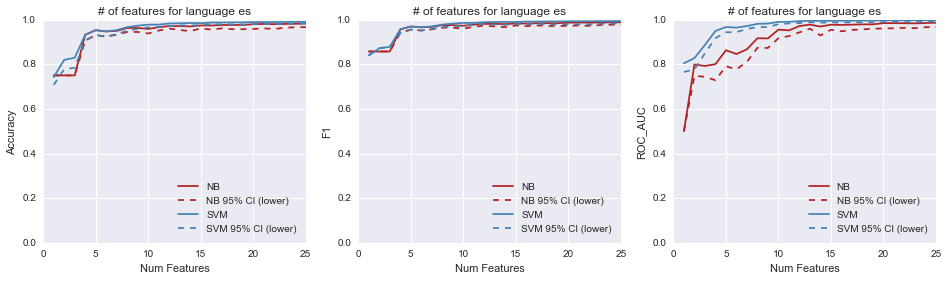

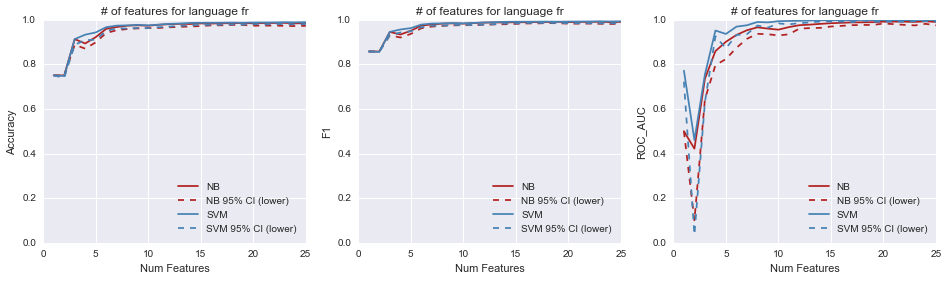

In [488]:
def experiment_3(corpi, language, num_features, feature_sampling_perc=.10):
    
    # Get the feature sampling corpus. Categories has to be restricted to the language of interest
    fs_corpus = skds.load_files(corpi[language], encoding='UTF-8', shuffle=True, categories=[language])
    
    # Discover features by count
    sub_sample = train_test_split(fs_corpus.data, fs_corpus.target, train_size=feature_sampling_perc)[0]
    vectorizer = CountVectorizer(analyzer='word', lowercase=True, encoding='UTF-8',
                                   max_features=num_features, token_pattern=token_pattern(), binary=True)
    vectorizer.fit(sub_sample)
    
    # Load the language corpus & fit a Naive Bayes classifier
    corpus = skds.load_files(corpi[language], encoding='UTF-8', shuffle=True)
    X = vectorizer.transform(corpus.data)
    y = corpus.target
    
    # Fit and evaluate a Naive Bayes Classifier
    classifier = MultinomialNB(fit_prior=True)
    scoring = ['accuracy','f1','roc_auc']
    nb_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
    
    # Fit and evaluate an SVM
    classifier = svm.SVC(kernel='rbf', C=1)
    svm_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
    
    # kernel=rbf (default)
    # decision function shape = ovo ( one-vs-rest) - original decision function in libsvm
    #  tol is the default 1e-3
    # default C = 1
    return {
        'num_features' : num_features,
        'features': vectorizer.get_feature_names(),
        'NB' : {
            'accuracy' : nb_results['test_accuracy'].mean(),
            'accuracy_95CI': nb_results['test_accuracy'].std() * 2,
            'f1' : nb_results['test_f1'].mean(),
            'f1_95CI': nb_results['test_f1'].std() * 2,
            'auc' : nb_results['test_roc_auc'].mean(),
            'auc_95CI': nb_results['test_roc_auc'].std() * 2
        },
        'SVM' : {
            'accuracy': svm_results['test_accuracy'].mean(),
            'accuracy_95CI' : svm_results['test_accuracy'].std() * 2,
            'f1': svm_results['test_f1'].mean(),
            'f1_95CI': svm_results['test_f1'].std() * 2,
            'auc': svm_results['test_roc_auc'].mean(),
            'auc_95CI': svm_results['test_roc_auc'].std() * 2
        }
    }

for language in languages:
    
    # Run tests for a language
    print "----------------------------------"
    print "----------------------------------"
    print "Starting experiments for language {0}".format(language)
    results = []
    for num_features in range(1, 25+1):
        exp_res = experiment_3(corpi, language, num_features)
        print "----------------------------------"
        print "Results for (lang: {0}, features: {1})".format(language, exp_res['num_features'])
        print "Features selected: {0}".format(exp_res['features'])
        print "Naive Bayes:"
        print "\tAccuracy {0}, +\/-95%CI {1}".format(exp_res['NB']['accuracy'], exp_res['NB']['accuracy_95CI'])
        print "\tF1 {0}, +\/-95%CI {1}".format(exp_res['NB']['f1'], exp_res['NB']['f1_95CI'])
        print "\tauc {0}, +\-95%CI {1}".format(exp_res['NB']['auc'],exp_res['NB']['auc_95CI'] )
        print "SVM:"
        print "\tAccuracy {0}, +\/-95%CI {1}".format(exp_res['SVM']['accuracy'], exp_res['SVM']['accuracy_95CI'])
        print "\tF1 {0}, +\/-95%CI {1}".format(exp_res['SVM']['f1'], exp_res['SVM']['f1_95CI'])
        print "\tauc {0}, +\-95%CI {1}".format(exp_res['SVM']['auc'],exp_res['SVM']['auc_95CI'] )
        results.append(exp_res)
            
    # Plotting NB
    figure = plt.figure(figsize=(16,4))
    nf = [result['num_features'] for result in results]
    
    # Accuracy on NB, SVM
    axes = figure.add_subplot(1,3,1)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_acc = [result['NB']['accuracy'] for result in results]
    nb_acc_lower = [result['NB']['accuracy'] - result['NB']['accuracy_95CI'] for result in results]
    h1, = axes.plot(nf, nb_acc, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_acc_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_acc = [result['SVM']['accuracy'] for result in results]
    svm_acc_lower = [result['SVM']['accuracy'] - result['SVM']['accuracy_95CI'] for result in results]
    h3, = axes.plot(nf, svm_acc, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_acc_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2,h3, h4], loc='lower right')
    axes.set_ylabel("Accuracy")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])

    # F1 on NB, SVM
    axes = figure.add_subplot(1,3,2)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_f1 = [result['NB']['f1'] for result in results]
    nb_f1_lower = [result['NB']['f1'] - result['NB']['f1_95CI'] for result in results]
    h1, = axes.plot(nf, nb_f1, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_f1_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_f1 =[result['SVM']['f1'] for result in results]
    svm_f1_lower = [result['SVM']['f1'] - result['NB']['f1_95CI'] for result in results]
    h3, = axes.plot(nf, svm_f1, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_f1_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2, h3, h4], loc='lower right')
    axes.set_ylabel("F1")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])
    
    # AUC on NB, SVM
    axes = figure.add_subplot(1,3,3)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_auc = [result['NB']['auc'] for result in results]
    nb_auc_lower = [result['NB']['auc'] - result['NB']['auc_95CI'] for result in results]
    h1, = axes.plot(nf, nb_auc, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_auc_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_auc = [result['SVM']['auc'] for result in results]
    svm_auc_lower = [result['SVM']['auc'] - result['SVM']['auc_95CI'] for result in results]
    h3, = axes.plot(nf, svm_auc, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_auc_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2, h3, h4], loc='lower right')
    axes.set_ylabel("ROC_AUC")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])

    
    print "Finished experiments for language {0}".format(language)

**Experiment 4**:  Can bi-grams help us?


----------------------------------
----------------------------------
Starting experiments for language en
----------------------------------
Results for (lang: en, features: 1)
Features selected: [u'of the']
Naive Bayes:
	Accuracy 0.75, +\/-95%CI 0.0
	F1 0.857142857143, +\/-95%CI 0.0
	auc 0.5, +\-95%CI 0.0
SVM:
	Accuracy 0.84625, +\/-95%CI 0.0273175767593
	F1 0.906606081092, +\/-95%CI 0.0149729274498
	auc 0.698166666667, +\-95%CI 0.0546188815541
----------------------------------
Results for (lang: en, features: 2)
Features selected: [u'in the', u'of the']
Naive Bayes:
	Accuracy 0.78925, +\/-95%CI 0.0478565564996
	F1 0.876915261901, +\/-95%CI 0.0242596350784
	auc 0.574905, +\-95%CI 0.0615235691964
SVM:
	Accuracy 0.896, +\/-95%CI 0.0238956062907
	F1 0.934846590304, +\/-95%CI 0.0137203996406
	auc 0.799428333333, +\-95%CI 0.0565790559012
----------------------------------
Results for (lang: en, features: 3)
Features selected: [u'in the', u'of the', u'to the']
Naive Bayes:
	Accuracy 0.783

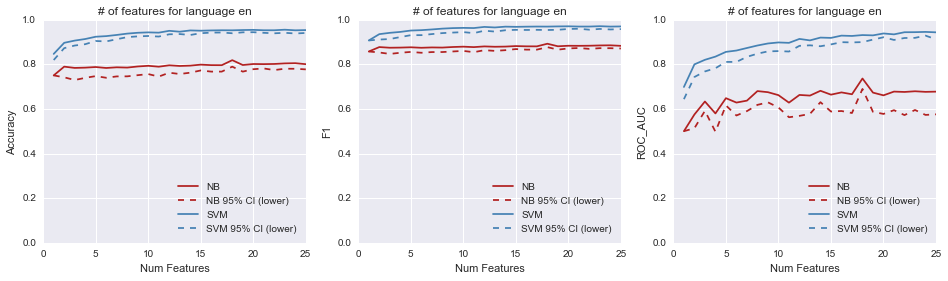

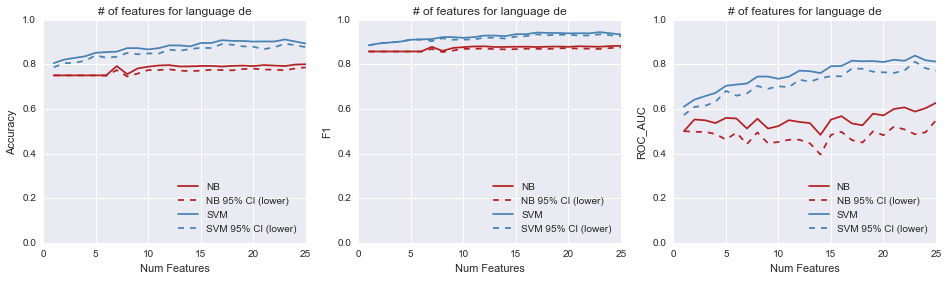

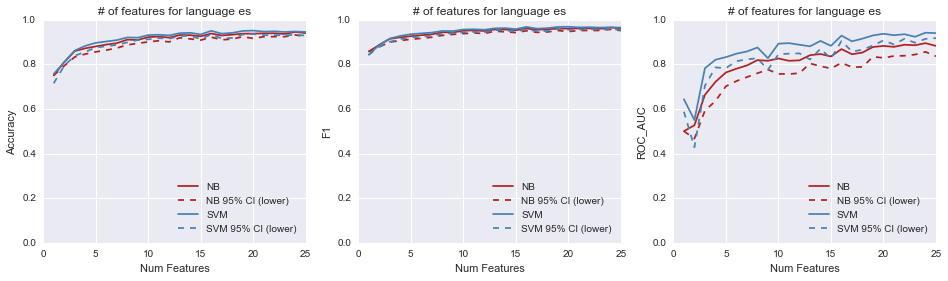

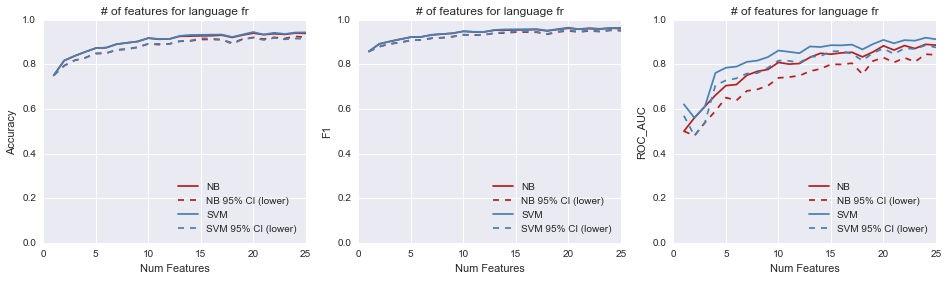

In [497]:
def experiment_4(corpi, language, num_features, feature_sampling_perc=.10):
    
    # Get the feature sampling corpus. Categories has to be restricted to the language of interest
    fs_corpus = skds.load_files(corpi[language], encoding='UTF-8', shuffle=True, categories=[language])
    
    # Discover features by count
    sub_sample = train_test_split(fs_corpus.data, fs_corpus.target, train_size=feature_sampling_perc)[0]
    vectorizer = CountVectorizer(analyzer='word', lowercase=True, encoding='UTF-8', ngram_range=(2,2),
                                   max_features=num_features, token_pattern=single_char_token_pattern(), binary=True)
    vectorizer.fit(sub_sample)
    
    # Load the language corpus & fit a Naive Bayes classifier
    corpus = skds.load_files(corpi[language], encoding='UTF-8', shuffle=True)
    X = vectorizer.transform(corpus.data)
    y = corpus.target
    
    # Fit and evaluate a Naive Bayes Classifier
    classifier = MultinomialNB(fit_prior=True)
    scoring = ['accuracy','f1','roc_auc']
    nb_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
    
    # Fit and evaluate an SVM
    classifier = svm.SVC(kernel='rbf', C=1)
    svm_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
    
    # kernel=rbf (default)
    # decision function shape = ovo ( one-vs-rest) - original decision function in libsvm
    #  tol is the default 1e-3
    # default C = 1
    return {
        'num_features' : num_features,
        'features': vectorizer.get_feature_names(),
        'NB' : {
            'accuracy' : nb_results['test_accuracy'].mean(),
            'accuracy_95CI': nb_results['test_accuracy'].std() * 2,
            'f1' : nb_results['test_f1'].mean(),
            'f1_95CI': nb_results['test_f1'].std() * 2,
            'auc' : nb_results['test_roc_auc'].mean(),
            'auc_95CI': nb_results['test_roc_auc'].std() * 2
        },
        'SVM' : {
            'accuracy': svm_results['test_accuracy'].mean(),
            'accuracy_95CI' : svm_results['test_accuracy'].std() * 2,
            'f1': svm_results['test_f1'].mean(),
            'f1_95CI': svm_results['test_f1'].std() * 2,
            'auc': svm_results['test_roc_auc'].mean(),
            'auc_95CI': svm_results['test_roc_auc'].std() * 2
        }
    }

for language in languages:
    
    # Run tests for a language
    print "----------------------------------"
    print "----------------------------------"
    print "Starting experiments for language {0}".format(language)
    results = []
    for num_features in range(1, 25+1):
        exp_res = experiment_4(corpi, language, num_features)
        print "----------------------------------"
        print "Results for (lang: {0}, features: {1})".format(language, exp_res['num_features'])
        print "Features selected: {0}".format(exp_res['features'])
        print "Naive Bayes:"
        print "\tAccuracy {0}, +\/-95%CI {1}".format(exp_res['NB']['accuracy'], exp_res['NB']['accuracy_95CI'])
        print "\tF1 {0}, +\/-95%CI {1}".format(exp_res['NB']['f1'], exp_res['NB']['f1_95CI'])
        print "\tauc {0}, +\-95%CI {1}".format(exp_res['NB']['auc'],exp_res['NB']['auc_95CI'] )
        print "SVM:"
        print "\tAccuracy {0}, +\/-95%CI {1}".format(exp_res['SVM']['accuracy'], exp_res['SVM']['accuracy_95CI'])
        print "\tF1 {0}, +\/-95%CI {1}".format(exp_res['SVM']['f1'], exp_res['SVM']['f1_95CI'])
        print "\tauc {0}, +\-95%CI {1}".format(exp_res['SVM']['auc'],exp_res['SVM']['auc_95CI'] )
        results.append(exp_res)
            
    # Plotting NB
    figure = plt.figure(figsize=(16,4))
    nf = [result['num_features'] for result in results]
    
    # Accuracy on NB, SVM
    axes = figure.add_subplot(1,3,1)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_acc = [result['NB']['accuracy'] for result in results]
    nb_acc_lower = [result['NB']['accuracy'] - result['NB']['accuracy_95CI'] for result in results]
    h1, = axes.plot(nf, nb_acc, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_acc_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_acc = [result['SVM']['accuracy'] for result in results]
    svm_acc_lower = [result['SVM']['accuracy'] - result['SVM']['accuracy_95CI'] for result in results]
    h3, = axes.plot(nf, svm_acc, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_acc_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2,h3, h4], loc='lower right')
    axes.set_ylabel("Accuracy")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])

    # F1 on NB, SVM
    axes = figure.add_subplot(1,3,2)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_f1 = [result['NB']['f1'] for result in results]
    nb_f1_lower = [result['NB']['f1'] - result['NB']['f1_95CI'] for result in results]
    h1, = axes.plot(nf, nb_f1, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_f1_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_f1 =[result['SVM']['f1'] for result in results]
    svm_f1_lower = [result['SVM']['f1'] - result['NB']['f1_95CI'] for result in results]
    h3, = axes.plot(nf, svm_f1, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_f1_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2, h3, h4], loc='lower right')
    axes.set_ylabel("F1")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])
    
    # AUC on NB, SVM
    axes = figure.add_subplot(1,3,3)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_auc = [result['NB']['auc'] for result in results]
    nb_auc_lower = [result['NB']['auc'] - result['NB']['auc_95CI'] for result in results]
    h1, = axes.plot(nf, nb_auc, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_auc_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_auc = [result['SVM']['auc'] for result in results]
    svm_auc_lower = [result['SVM']['auc'] - result['SVM']['auc_95CI'] for result in results]
    h3, = axes.plot(nf, svm_auc, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_auc_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2, h3, h4], loc='lower right')
    axes.set_ylabel("ROC_AUC")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])

    
    print "Finished experiments for language {0}".format(language)

**Experiment 5** What about unigrams & bigrams together? 

----------------------------------
----------------------------------
Starting experiments for language en
----------------------------------
Results for (lang: en, features: 1)
Features selected: [u'the']
Naive Bayes:
	Accuracy 0.75, +\/-95%CI 0.0
	F1 0.857142857143, +\/-95%CI 0.0
	auc 0.5, +\-95%CI 0.0
SVM:
	Accuracy 0.9635, +\/-95%CI 0.0150332963784
	F1 0.975463990759, +\/-95%CI 0.0101277010381
	auc 0.959333333333, +\-95%CI 0.0195618676682
----------------------------------
Results for (lang: en, features: 2)
Features selected: [u'in', u'the']
Naive Bayes:
	Accuracy 0.77775, +\/-95%CI 0.019551214796
	F1 0.868379967416, +\/-95%CI 0.0102059756087
	auc 0.941863333333, +\-95%CI 0.0228091833358
SVM:
	Accuracy 0.9635, +\/-95%CI 0.0150332963784
	F1 0.975463990759, +\/-95%CI 0.0101277010381
	auc 0.957453333333, +\-95%CI 0.0207802994311
----------------------------------
Results for (lang: en, features: 3)
Features selected: [u'and', u'in', u'the']
Naive Bayes:
	Accuracy 0.9275, +\/-95%CI 0.

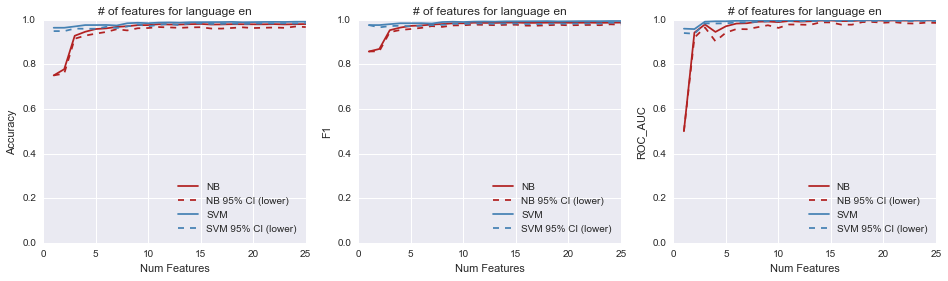

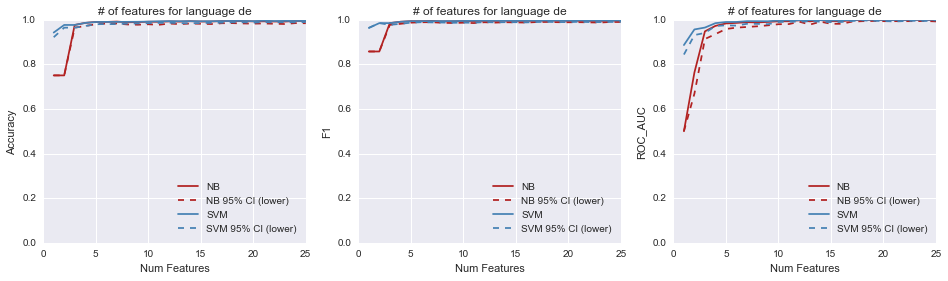

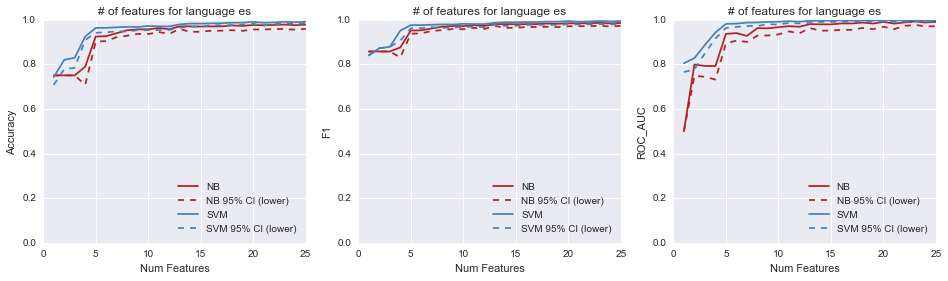

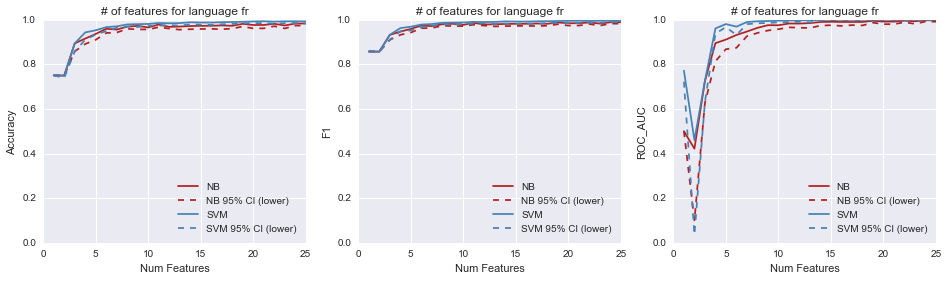

In [499]:
def experiment_5(corpi, language, num_features, feature_sampling_perc=.10):
    
    # Get the feature sampling corpus. Categories has to be restricted to the language of interest
    fs_corpus = skds.load_files(corpi[language], encoding='UTF-8', shuffle=True, categories=[language])
    
    # Discover features by count
    sub_sample = train_test_split(fs_corpus.data, fs_corpus.target, train_size=feature_sampling_perc)[0]
    vectorizer = CountVectorizer(analyzer='word', lowercase=True, encoding='UTF-8', ngram_range=(1,2),
                                   max_features=num_features, token_pattern=single_char_token_pattern(), binary=True)
    vectorizer.fit(sub_sample)
    
    # Load the language corpus & fit a Naive Bayes classifier
    corpus = skds.load_files(corpi[language], encoding='UTF-8', shuffle=True)
    X = vectorizer.transform(corpus.data)
    y = corpus.target
    
    # Fit and evaluate a Naive Bayes Classifier
    classifier = MultinomialNB(fit_prior=True)
    scoring = ['accuracy','f1','roc_auc']
    nb_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
    
    # Fit and evaluate an SVM
    classifier = svm.SVC(kernel='rbf', C=1)
    svm_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
    
    # kernel=rbf (default)
    # decision function shape = ovo ( one-vs-rest) - original decision function in libsvm
    #  tol is the default 1e-3
    # default C = 1
    return {
        'num_features' : num_features,
        'features': vectorizer.get_feature_names(),
        'NB' : {
            'accuracy' : nb_results['test_accuracy'].mean(),
            'accuracy_95CI': nb_results['test_accuracy'].std() * 2,
            'f1' : nb_results['test_f1'].mean(),
            'f1_95CI': nb_results['test_f1'].std() * 2,
            'auc' : nb_results['test_roc_auc'].mean(),
            'auc_95CI': nb_results['test_roc_auc'].std() * 2
        },
        'SVM' : {
            'accuracy': svm_results['test_accuracy'].mean(),
            'accuracy_95CI' : svm_results['test_accuracy'].std() * 2,
            'f1': svm_results['test_f1'].mean(),
            'f1_95CI': svm_results['test_f1'].std() * 2,
            'auc': svm_results['test_roc_auc'].mean(),
            'auc_95CI': svm_results['test_roc_auc'].std() * 2
        }
    }

for language in languages:
    
    # Run tests for a language
    print "----------------------------------"
    print "----------------------------------"
    print "Starting experiments for language {0}".format(language)
    results = []
    for num_features in range(1, 25+1):
        exp_res = experiment_5(corpi, language, num_features)
        print "----------------------------------"
        print "Results for (lang: {0}, features: {1})".format(language, exp_res['num_features'])
        print "Features selected: {0}".format(exp_res['features'])
        print "Naive Bayes:"
        print "\tAccuracy {0}, +\/-95%CI {1}".format(exp_res['NB']['accuracy'], exp_res['NB']['accuracy_95CI'])
        print "\tF1 {0}, +\/-95%CI {1}".format(exp_res['NB']['f1'], exp_res['NB']['f1_95CI'])
        print "\tauc {0}, +\-95%CI {1}".format(exp_res['NB']['auc'],exp_res['NB']['auc_95CI'] )
        print "SVM:"
        print "\tAccuracy {0}, +\/-95%CI {1}".format(exp_res['SVM']['accuracy'], exp_res['SVM']['accuracy_95CI'])
        print "\tF1 {0}, +\/-95%CI {1}".format(exp_res['SVM']['f1'], exp_res['SVM']['f1_95CI'])
        print "\tauc {0}, +\-95%CI {1}".format(exp_res['SVM']['auc'],exp_res['SVM']['auc_95CI'] )
        results.append(exp_res)
            
    # Plotting NB
    figure = plt.figure(figsize=(16,4))
    nf = [result['num_features'] for result in results]
    
    # Accuracy on NB, SVM
    axes = figure.add_subplot(1,3,1)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_acc = [result['NB']['accuracy'] for result in results]
    nb_acc_lower = [result['NB']['accuracy'] - result['NB']['accuracy_95CI'] for result in results]
    h1, = axes.plot(nf, nb_acc, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_acc_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_acc = [result['SVM']['accuracy'] for result in results]
    svm_acc_lower = [result['SVM']['accuracy'] - result['SVM']['accuracy_95CI'] for result in results]
    h3, = axes.plot(nf, svm_acc, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_acc_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2,h3, h4], loc='lower right')
    axes.set_ylabel("Accuracy")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])

    # F1 on NB, SVM
    axes = figure.add_subplot(1,3,2)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_f1 = [result['NB']['f1'] for result in results]
    nb_f1_lower = [result['NB']['f1'] - result['NB']['f1_95CI'] for result in results]
    h1, = axes.plot(nf, nb_f1, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_f1_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_f1 =[result['SVM']['f1'] for result in results]
    svm_f1_lower = [result['SVM']['f1'] - result['NB']['f1_95CI'] for result in results]
    h3, = axes.plot(nf, svm_f1, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_f1_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2, h3, h4], loc='lower right')
    axes.set_ylabel("F1")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])
    
    # AUC on NB, SVM
    axes = figure.add_subplot(1,3,3)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_auc = [result['NB']['auc'] for result in results]
    nb_auc_lower = [result['NB']['auc'] - result['NB']['auc_95CI'] for result in results]
    h1, = axes.plot(nf, nb_auc, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_auc_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_auc = [result['SVM']['auc'] for result in results]
    svm_auc_lower = [result['SVM']['auc'] - result['SVM']['auc_95CI'] for result in results]
    h3, = axes.plot(nf, svm_auc, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_auc_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2, h3, h4], loc='lower right')
    axes.set_ylabel("ROC_AUC")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])

    
    print "Finished experiments for language {0}".format(language)

-----

Lexical similarity

In [507]:
lex_corpi = {
    'original' : '../data/lexical/corpus',
    'fr' : '../data/lexical/fr_corpus',
    'it' : '../data/lexical/it_corpus',
    'pt' : '../data/lexical/pt_corpus'
}

lex_languages = ['fr','it','pt']

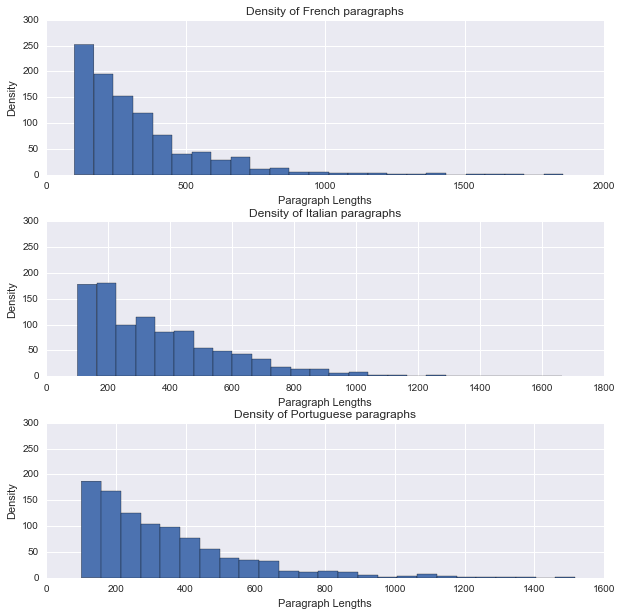

In [508]:
# Plot a histogram of the lexically similar paragraphs
fr_lengths = [len(p) for p in skds.load_files(lex_corpi['fr'], encoding='UTF-8', shuffle=True, categories=['fr']).data]
it_lengths = [len(p) for p in skds.load_files(lex_corpi['it'], encoding='UTF-8', shuffle=True, categories=['it']).data]              
pt_lengths = [len(p) for p in skds.load_files(lex_corpi['pt'], encoding='UTF-8', shuffle=True, categories=['pt']).data]  

bins = 25
y = [0, 300]
figure = plt.figure(figsize=(10,10))
axes = figure.add_subplot(3,1,1)
axes.hist(fr_lengths, bins=bins)
axes.set_title("Density of French paragraphs")
axes.set_ylabel("Density")
axes.set_xlabel("Paragraph Lengths")
axes.set_ylim(y)

axes = figure.add_subplot(3,1,2)
axes.hist(it_lengths, bins=bins)
axes.set_title("Density of Italian paragraphs")
axes.set_ylabel("Density")
axes.set_xlabel("Paragraph Lengths")
axes.set_ylim(y)

axes = figure.add_subplot(3,1,3)
axes.hist(pt_lengths, bins=bins)
axes.set_title("Density of Portuguese paragraphs")
axes.set_ylabel("Density")
axes.set_xlabel("Paragraph Lengths")
axes.set_ylim(y)

# Improved spacing between plots
figure.subplots_adjust(hspace=.3)

# Show the plots
plt.show()

**Experiment 6** How do we do when classifying languages with high lexical similarity?  Italian, Portugues and French.

----------------------------------
----------------------------------
Starting experiments for language fr
----------------------------------
Results for (lang: fr, features: 1)
Features selected: [u'de']
Naive Bayes:
	Accuracy 0.666666666667, +\/-95%CI 2.22044604925e-16
	F1 0.8, +\/-95%CI 0.0
	auc 0.5, +\-95%CI 0.0
SVM:
	Accuracy 0.675666666667, +\/-95%CI 0.0266749986983
	F1 0.789868921967, +\/-95%CI 0.0289592657208
	auc 0.5823175, +\-95%CI 0.215414137245
----------------------------------
Results for (lang: fr, features: 2)
Features selected: [u'de', u'la']
Naive Bayes:
	Accuracy 0.642666666667, +\/-95%CI 0.0358763307922
	F1 0.777847266569, +\/-95%CI 0.0261255979929
	auc 0.5514025, +\-95%CI 0.0617809778573
SVM:
	Accuracy 0.874, +\/-95%CI 0.0513636274247
	F1 0.911400181714, +\/-95%CI 0.0336163997396
	auc 0.8418775, +\-95%CI 0.0735527852974
----------------------------------
Results for (lang: fr, features: 3)
Features selected: [u'de', u'di', u'la']
Naive Bayes:
	Accuracy 0.7376666666

/Users/cjeschke/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------------------------
Results for (lang: pt, features: 1)
Features selected: [u'de']
Naive Bayes:
	Accuracy 0.666666666667, +\/-95%CI 2.22044604925e-16
	F1 0.0, +\/-95%CI 0.0
	auc 0.5, +\-95%CI 0.0
SVM:
	Accuracy 0.677333333333, +\/-95%CI 0.0361232458244
	F1 0.402365665577, +\/-95%CI 0.0736523207054
	auc 0.5802075, +\-95%CI 0.165604276892
----------------------------------
Results for (lang: pt, features: 2)
Features selected: [u'de', u'la']
Naive Bayes:
	Accuracy 0.878, +\/-95%CI 0.0379707489757
	F1 0.821299931362, +\/-95%CI 0.0525949733254
	auc 0.9374075, +\-95%CI 0.0270229351663
SVM:
	Accuracy 0.878666666667, +\/-95%CI 0.036781637931
	F1 0.821196280048, +\/-95%CI 0.0512475053042
	auc 0.9150025, +\-95%CI 0.0297072924549
----------------------------------
Results for (lang: pt, features: 3)
Features selected: [u'de', u'di', u'la']
Naive Bayes:
	Accuracy 0.875333333333, +\/-95%CI 0.0355527776693
	F1 0.817723115028, +\/-95%CI 0.0490299428923
	auc 0.9430225, +\-95%CI 0.02320

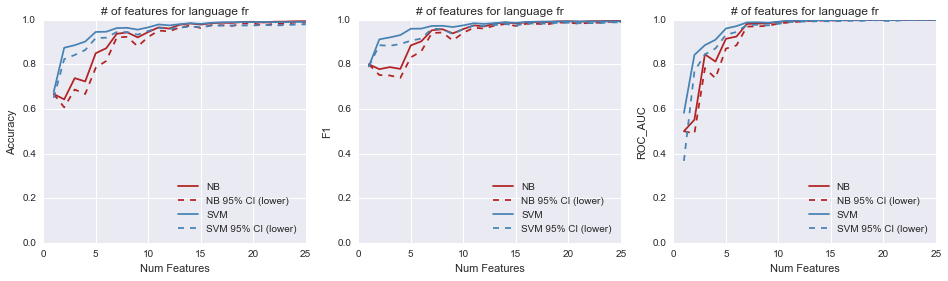

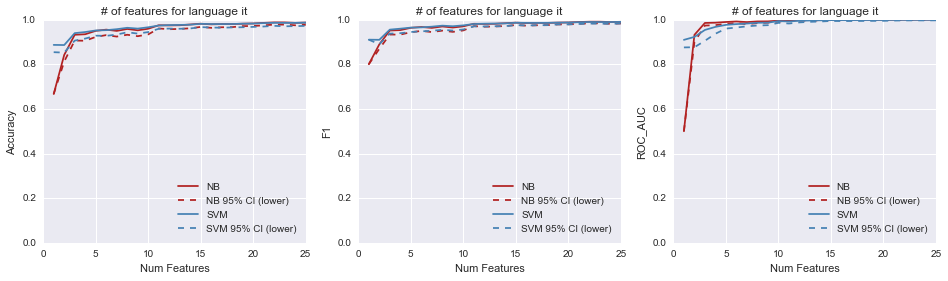

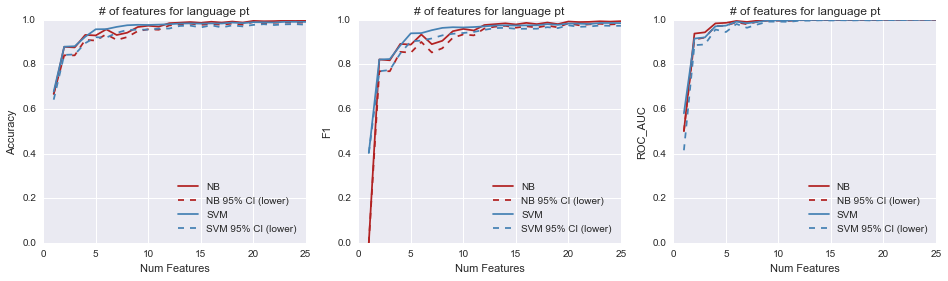

In [509]:
random.seed(123454321)
np.random.seed(123454321)

def experiment_6(corpi, language, num_features, feature_sampling_perc=.10):
    
    # Get the feature sampling corpus.  We'll sample from all languages here.
    fs_corpus = skds.load_files(corpi['original'], encoding='UTF-8', shuffle=True)
    
    # Discover features by count
    sub_sample = train_test_split(fs_corpus.data, fs_corpus.target, train_size=feature_sampling_perc)[0]
    vectorizer = CountVectorizer(analyzer='word', lowercase=True, encoding='UTF-8',
                                   max_features=num_features, token_pattern=token_pattern())
    vectorizer.fit(sub_sample)
    
    # Load the language corpus & fit a Naive Bayes classifier
    corpus = skds.load_files(corpi[language], encoding='UTF-8', shuffle=True)
    X = vectorizer.transform(corpus.data)
    y = corpus.target
    
    # Fit and evaluate a Naive Bayes Classifier
    classifier = MultinomialNB(fit_prior=True)
    scoring = ['accuracy','f1','roc_auc']
    nb_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
    
    # Fit and evaluate an SVM
    classifier = svm.SVC(kernel='rbf', C=1)
    svm_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
    
    # kernel=rbf (default)
    # decision function shape = ovo ( one-vs-rest) - original decision function in libsvm
    #  tol is the default 1e-3
    # default C = 1
    return {
        'num_features' : num_features,
        'features': vectorizer.get_feature_names(),
        'NB' : {
            'accuracy' : nb_results['test_accuracy'].mean(),
            'accuracy_95CI': nb_results['test_accuracy'].std() * 2,
            'f1' : nb_results['test_f1'].mean(),
            'f1_95CI': nb_results['test_f1'].std() * 2,
            'auc' : nb_results['test_roc_auc'].mean(),
            'auc_95CI': nb_results['test_roc_auc'].std() * 2
        },
        'SVM' : {
            'accuracy': svm_results['test_accuracy'].mean(),
            'accuracy_95CI' : svm_results['test_accuracy'].std() * 2,
            'f1': svm_results['test_f1'].mean(),
            'f1_95CI': svm_results['test_f1'].std() * 2,
            'auc': svm_results['test_roc_auc'].mean(),
            'auc_95CI': svm_results['test_roc_auc'].std() * 2
        }
    }



for language in lex_languages:
    
    # Run tests for a language
    print "----------------------------------"
    print "----------------------------------"
    print "Starting experiments for language {0}".format(language)
    results = []
    for num_features in range(1, 25+1):
        exp_res = experiment_6(lex_corpi, language, num_features)

        print "----------------------------------"
        print "Results for (lang: {0}, features: {1})".format(language, exp_res['num_features'])
        print "Features selected: {0}".format(exp_res['features'])
        print "Naive Bayes:"
        print "\tAccuracy {0}, +\/-95%CI {1}".format(exp_res['NB']['accuracy'], exp_res['NB']['accuracy_95CI'])
        print "\tF1 {0}, +\/-95%CI {1}".format(exp_res['NB']['f1'], exp_res['NB']['f1_95CI'])
        print "\tauc {0}, +\-95%CI {1}".format(exp_res['NB']['auc'],exp_res['NB']['auc_95CI'] )
        print "SVM:"
        print "\tAccuracy {0}, +\/-95%CI {1}".format(exp_res['SVM']['accuracy'], exp_res['SVM']['accuracy_95CI'])
        print "\tF1 {0}, +\/-95%CI {1}".format(exp_res['SVM']['f1'], exp_res['SVM']['f1_95CI'])
        print "\tauc {0}, +\-95%CI {1}".format(exp_res['SVM']['auc'],exp_res['SVM']['auc_95CI'] )
        results.append(exp_res)
            
    # Plotting NB
    figure = plt.figure(figsize=(16,4))
    nf = [result['num_features'] for result in results]
    
    # Accuracy on NB, SVM
    axes = figure.add_subplot(1,3,1)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_acc = [result['NB']['accuracy'] for result in results]
    nb_acc_lower = [result['NB']['accuracy'] - result['NB']['accuracy_95CI'] for result in results]
    h1, = axes.plot(nf, nb_acc, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_acc_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_acc = [result['SVM']['accuracy'] for result in results]
    svm_acc_lower = [result['SVM']['accuracy'] - result['SVM']['accuracy_95CI'] for result in results]
    h3, = axes.plot(nf, svm_acc, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_acc_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2,h3, h4], loc='lower right')
    axes.set_ylabel("Accuracy")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])

    # F1 on NB, SVM
    axes = figure.add_subplot(1,3,2)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_f1 = [result['NB']['f1'] for result in results]
    nb_f1_lower = [result['NB']['f1'] - result['NB']['f1_95CI'] for result in results]
    h1, = axes.plot(nf, nb_f1, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_f1_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_f1 =[result['SVM']['f1'] for result in results]
    svm_f1_lower = [result['SVM']['f1'] - result['NB']['f1_95CI'] for result in results]
    h3, = axes.plot(nf, svm_f1, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_f1_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2, h3, h4], loc='lower right')
    axes.set_ylabel("F1")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])
    
    # AUC on NB, SVM
    axes = figure.add_subplot(1,3,3)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_auc = [result['NB']['auc'] for result in results]
    nb_auc_lower = [result['NB']['auc'] - result['NB']['auc_95CI'] for result in results]
    h1, = axes.plot(nf, nb_auc, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_auc_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_auc = [result['SVM']['auc'] for result in results]
    svm_auc_lower = [result['SVM']['auc'] - result['SVM']['auc_95CI'] for result in results]
    h3, = axes.plot(nf, svm_auc, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_auc_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2, h3, h4], loc='lower right')
    axes.set_ylabel("ROC_AUC")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])

    
    print "Finished experiments for language {0}".format(language)

**Experiment 7**:  Language specific learned words

----------------------------------
----------------------------------
Starting experiments for language fr
----------------------------------
Results for (lang: fr, features: 1)
Features selected: [u'de']
Naive Bayes:
	Accuracy 0.666666666667, +\/-95%CI 2.22044604925e-16
	F1 0.8, +\/-95%CI 0.0
	auc 0.5, +\-95%CI 0.0
SVM:
	Accuracy 0.666666666667, +\/-95%CI 2.22044604925e-16
	F1 0.8, +\/-95%CI 0.0
	auc 0.706, +\-95%CI 0.0523545604508
----------------------------------
Results for (lang: fr, features: 2)
Features selected: [u'de', u'la']
Naive Bayes:
	Accuracy 0.666666666667, +\/-95%CI 2.22044604925e-16
	F1 0.8, +\/-95%CI 0.0
	auc 0.5953325, +\-95%CI 0.0526620074152
SVM:
	Accuracy 0.875666666667, +\/-95%CI 0.0505129246387
	F1 0.912599163565, +\/-95%CI 0.0330221604473
	auc 0.8474225, +\-95%CI 0.0776688304598
----------------------------------
Results for (lang: fr, features: 3)
Features selected: [u'de', u'il', u'la']
Naive Bayes:
	Accuracy 0.666666666667, +\/-95%CI 2.22044604925e-16
	F1 

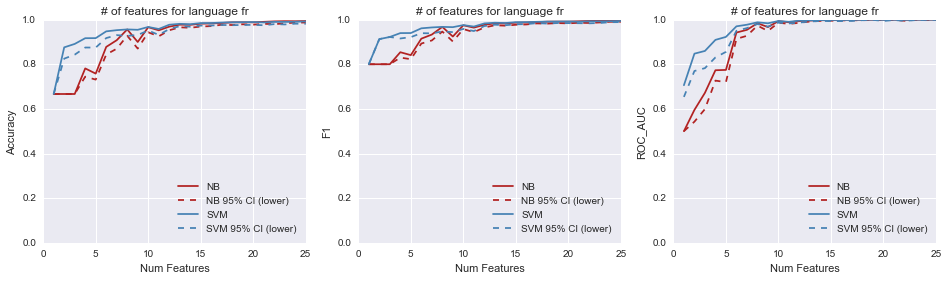

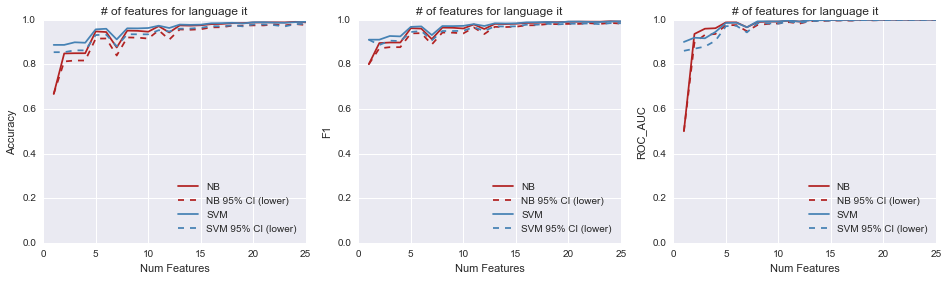

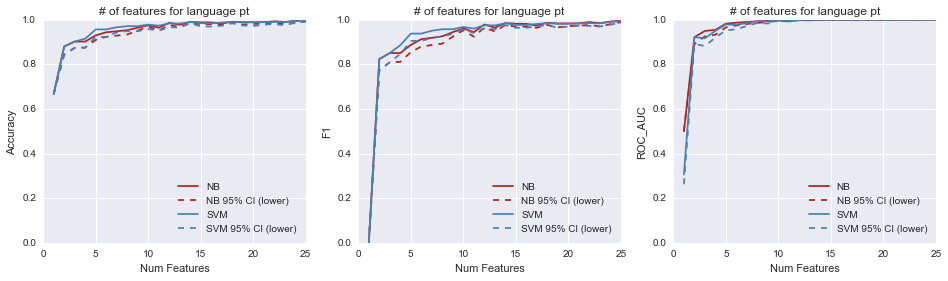

In [521]:
def experiment_7(corpi, language, num_features, feature_sampling_perc=.10):
    
    # sample from the lanuage corpu
    fs_corpus = skds.load_files(corpi[language], encoding='UTF-8', shuffle=True)
    
    # Discover features by count
    sub_sample = train_test_split(fs_corpus.data, fs_corpus.target, train_size=feature_sampling_perc)[0]
    vectorizer = CountVectorizer(analyzer='word', lowercase=True, encoding='UTF-8',
                                   max_features=num_features, token_pattern=token_pattern(), binary=True)
    vectorizer.fit(sub_sample)
    
    # Load the language corpus & fit a Naive Bayes classifier
    corpus = skds.load_files(corpi[language], encoding='UTF-8', shuffle=True)
    X = vectorizer.transform(corpus.data)
    y = corpus.target
    
    # Fit and evaluate a Naive Bayes Classifier
    classifier = MultinomialNB(fit_prior=True)
    scoring = ['accuracy','f1','roc_auc']
    nb_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
    
    # Fit and evaluate an SVM
    classifier = svm.SVC(kernel='rbf', C=1)
    svm_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
    
    # kernel=rbf (default)
    # decision function shape = ovo ( one-vs-rest) - original decision function in libsvm
    #  tol is the default 1e-3
    # default C = 1
    return {
        'num_features' : num_features,
        'features': vectorizer.get_feature_names(),
        'NB' : {
            'accuracy' : nb_results['test_accuracy'].mean(),
            'accuracy_95CI': nb_results['test_accuracy'].std() * 2,
            'f1' : nb_results['test_f1'].mean(),
            'f1_95CI': nb_results['test_f1'].std() * 2,
            'auc' : nb_results['test_roc_auc'].mean(),
            'auc_95CI': nb_results['test_roc_auc'].std() * 2
        },
        'SVM' : {
            'accuracy': svm_results['test_accuracy'].mean(),
            'accuracy_95CI' : svm_results['test_accuracy'].std() * 2,
            'f1': svm_results['test_f1'].mean(),
            'f1_95CI': svm_results['test_f1'].std() * 2,
            'auc': svm_results['test_roc_auc'].mean(),
            'auc_95CI': svm_results['test_roc_auc'].std() * 2
        }
    }



for language in lex_languages:
    
    # Run tests for a language
    print "----------------------------------"
    print "----------------------------------"
    print "Starting experiments for language {0}".format(language)
    results = []
    for num_features in range(1, 25+1):
        exp_res = experiment_7(lex_corpi, language, num_features)

        print "----------------------------------"
        print "Results for (lang: {0}, features: {1})".format(language, exp_res['num_features'])
        print "Features selected: {0}".format(exp_res['features'])
        print "Naive Bayes:"
        print "\tAccuracy {0}, +\/-95%CI {1}".format(exp_res['NB']['accuracy'], exp_res['NB']['accuracy_95CI'])
        print "\tF1 {0}, +\/-95%CI {1}".format(exp_res['NB']['f1'], exp_res['NB']['f1_95CI'])
        print "\tauc {0}, +\-95%CI {1}".format(exp_res['NB']['auc'],exp_res['NB']['auc_95CI'] )
        print "SVM:"
        print "\tAccuracy {0}, +\/-95%CI {1}".format(exp_res['SVM']['accuracy'], exp_res['SVM']['accuracy_95CI'])
        print "\tF1 {0}, +\/-95%CI {1}".format(exp_res['SVM']['f1'], exp_res['SVM']['f1_95CI'])
        print "\tauc {0}, +\-95%CI {1}".format(exp_res['SVM']['auc'],exp_res['SVM']['auc_95CI'] )
        results.append(exp_res)
            
    # Plotting NB
    figure = plt.figure(figsize=(16,4))
    nf = [result['num_features'] for result in results]
    
    # Accuracy on NB, SVM
    axes = figure.add_subplot(1,3,1)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_acc = [result['NB']['accuracy'] for result in results]
    nb_acc_lower = [result['NB']['accuracy'] - result['NB']['accuracy_95CI'] for result in results]
    h1, = axes.plot(nf, nb_acc, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_acc_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_acc = [result['SVM']['accuracy'] for result in results]
    svm_acc_lower = [result['SVM']['accuracy'] - result['SVM']['accuracy_95CI'] for result in results]
    h3, = axes.plot(nf, svm_acc, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_acc_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2,h3, h4], loc='lower right')
    axes.set_ylabel("Accuracy")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])

    # F1 on NB, SVM
    axes = figure.add_subplot(1,3,2)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_f1 = [result['NB']['f1'] for result in results]
    nb_f1_lower = [result['NB']['f1'] - result['NB']['f1_95CI'] for result in results]
    h1, = axes.plot(nf, nb_f1, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_f1_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_f1 =[result['SVM']['f1'] for result in results]
    svm_f1_lower = [result['SVM']['f1'] - result['NB']['f1_95CI'] for result in results]
    h3, = axes.plot(nf, svm_f1, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_f1_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2, h3, h4], loc='lower right')
    axes.set_ylabel("F1")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])
    
    # AUC on NB, SVM
    axes = figure.add_subplot(1,3,3)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_auc = [result['NB']['auc'] for result in results]
    nb_auc_lower = [result['NB']['auc'] - result['NB']['auc_95CI'] for result in results]
    h1, = axes.plot(nf, nb_auc, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_auc_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_auc = [result['SVM']['auc'] for result in results]
    svm_auc_lower = [result['SVM']['auc'] - result['SVM']['auc_95CI'] for result in results]
    h3, = axes.plot(nf, svm_auc, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_auc_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2, h3, h4], loc='lower right')
    axes.set_ylabel("ROC_AUC")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])

    
    print "Finished experiments for language {0}".format(language)

In [530]:
fr_features=set([u'che', u'da', u'dans', u'de', u'del', u'des', u'di', u'do', u'du', u'em', u'en', u'est', u'et', u'il', u'in', u'la', u'le', u'les', u'par', u'per', u'que', u'qui', u'se', u'un', u'une'])
it_features=set([u'che', u'da', u'dans', u'de', u'del', u'della', u'di', u'do', u'du', u'em', u'en', u'est', u'et', u'il', u'in', u'la', u'le', u'les', u'na', u'no', u'que', u'se', u'um', u'un', u'une'])
pt_features=set([u'com', u'da', u'dans', u'de', u'del', u'des', u'di', u'do', u'du', u'em', u'en', u'est', u'et', u'il', u'in', u'la', u'le', u'les', u'no', u'per', u'que', u'se', u'um', u'uma', u'un'])

intersection = set.intersection(fr_features, it_features, pt_features)
print "Intersection between all sets has {0} elements: {1}".format(len(intersection), intersection)
diff_fr_it = set.symmetric_difference(fr_features, it_features)
print "Symmetric diff between FR, IT has {0} elements: {1}".format(len(diff_fr_it), diff_fr_it)
diff_it_pt = set.symmetric_difference(it_features, pt_features)
print "Symmetric diff between IT, PT has {0} elements: {1}".format(len(diff_it_pt), diff_it_pt)
diff_pt_fr = set.symmetric_difference(pt_features, fr_features)
print "Symmetric diff between PT, FR has {0} elements: {1}".format(len(diff_pt_fr), diff_pt_fr)

features = {}
for feature_set in [fr_features, it_features, pt_features]:
    for f in feature_set:
        if f not in features:
            features[f] = 1
        else:
            features[f] += 1
        
unique_features = [f for f in features if features[f] == 1]
print "Here are the unique features: {0}".format(unique_features)

Intersection between all sets has 19 elements: set([u'em', u'do', u'en', u'du', u'la', u'et', u'di', u'dans', u'est', u'da', u'le', u'de', u'les', u'del', u'il', u'in', u'que', u'un', u'se'])
Symmetric diff between FR, IT has 8 elements: set([u'des', u'qui', u'par', u'na', u'no', u'per', u'um', u'della'])
Symmetric diff between IT, PT has 8 elements: set([u'che', u'com', u'per', u'uma', u'une', u'na', u'des', u'della'])
Symmetric diff between PT, FR has 8 elements: set([u'qui', u'par', u'che', u'no', u'um', u'une', u'uma', u'com'])
Here are the unique features: [u'par', u'na', u'uma', u'qui', u'della', u'com']


**Experiment 8:** Language specific bi-grams

----------------------------------
----------------------------------
Starting experiments for language fr
----------------------------------
Results for (lang: fr, features: 1)
Features selected: [u'de la']
Naive Bayes:
	Accuracy 0.666666666667, +\/-95%CI 2.22044604925e-16
	F1 0.8, +\/-95%CI 0.0
	auc 0.5, +\-95%CI 0.0
SVM:
	Accuracy 0.789666666667, +\/-95%CI 0.0438634243989
	F1 0.863080869905, +\/-95%CI 0.0248056607643
	auc 0.6883025, +\-95%CI 0.0656835536874
----------------------------------
Results for (lang: fr, features: 2)
Features selected: [u'de la', u'la lettre']
Naive Bayes:
	Accuracy 0.695666666667, +\/-95%CI 0.0200111080264
	F1 0.814196907073, +\/-95%CI 0.00995496257232
	auc 0.3854375, +\-95%CI 0.0597540887722
SVM:
	Accuracy 0.801, +\/-95%CI 0.0471451658886
	F1 0.869536787732, +\/-95%CI 0.0270254612722
	auc 0.7053575, +\-95%CI 0.0704717072661
----------------------------------
Results for (lang: fr, features: 3)
Features selected: [u'dans le', u'dans les', u'de la']
Naive 

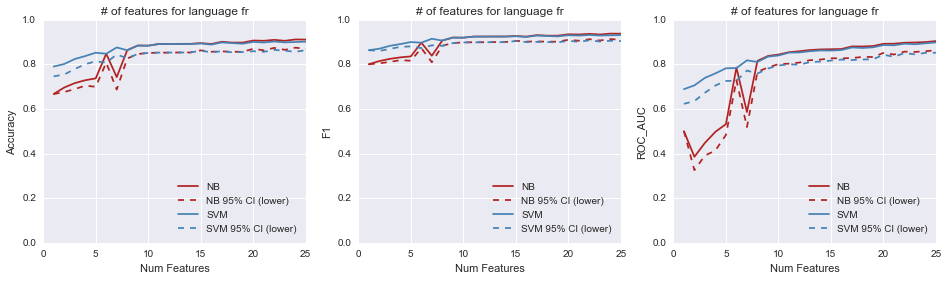

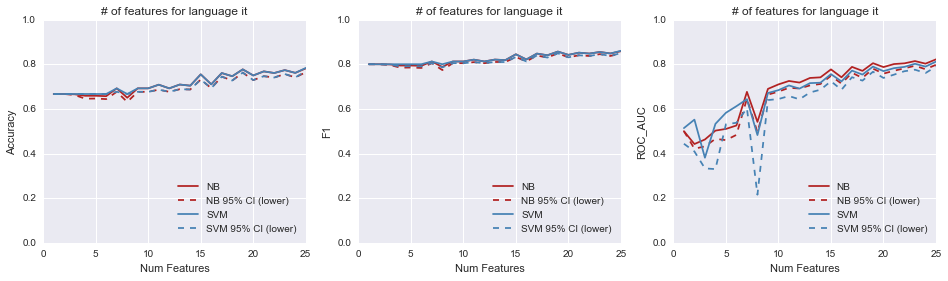

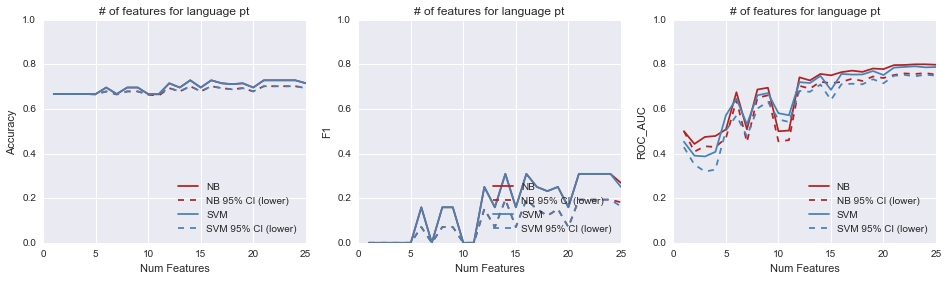

In [513]:
def experiment_8(corpi, language, num_features, feature_sampling_perc=.50):
    
    # sample from the lanuage corpu
    fs_corpus = skds.load_files(corpi[language], encoding='UTF-8', shuffle=True)
    
    # Discover features by count
    sub_sample = train_test_split(fs_corpus.data, fs_corpus.target, train_size=feature_sampling_perc)[0]
    vectorizer = CountVectorizer(analyzer='word', lowercase=True, encoding='UTF-8',
                                   max_features=num_features, token_pattern=token_pattern(), ngram_range=(2,2))
    vectorizer.fit(sub_sample)
    
    # Load the language corpus & fit a Naive Bayes classifier
    corpus = skds.load_files(corpi[language], encoding='UTF-8', shuffle=True)
    X = vectorizer.transform(corpus.data)
    y = corpus.target
    
    # Fit and evaluate a Naive Bayes Classifier
    classifier = MultinomialNB(fit_prior=True)
    scoring = ['accuracy','f1','roc_auc']
    nb_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
    
    # Fit and evaluate an SVM
    classifier = svm.SVC(kernel='rbf', C=1)
    svm_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
    
    # kernel=rbf (default)
    # decision function shape = ovo ( one-vs-rest) - original decision function in libsvm
    #  tol is the default 1e-3
    # default C = 1
    return {
        'num_features' : num_features,
        'features': vectorizer.get_feature_names(),
        'NB' : {
            'accuracy' : nb_results['test_accuracy'].mean(),
            'accuracy_95CI': nb_results['test_accuracy'].std() * 2,
            'f1' : nb_results['test_f1'].mean(),
            'f1_95CI': nb_results['test_f1'].std() * 2,
            'auc' : nb_results['test_roc_auc'].mean(),
            'auc_95CI': nb_results['test_roc_auc'].std() * 2
        },
        'SVM' : {
            'accuracy': svm_results['test_accuracy'].mean(),
            'accuracy_95CI' : svm_results['test_accuracy'].std() * 2,
            'f1': svm_results['test_f1'].mean(),
            'f1_95CI': svm_results['test_f1'].std() * 2,
            'auc': svm_results['test_roc_auc'].mean(),
            'auc_95CI': svm_results['test_roc_auc'].std() * 2
        }
    }



for language in lex_languages:
    
    # Run tests for a language
    print "----------------------------------"
    print "----------------------------------"
    print "Starting experiments for language {0}".format(language)
    results = []
    for num_features in range(1, 25+1):
        exp_res = experiment_8(lex_corpi, language, num_features)

        print "----------------------------------"
        print "Results for (lang: {0}, features: {1})".format(language, exp_res['num_features'])
        print "Features selected: {0}".format(exp_res['features'])
        print "Naive Bayes:"
        print "\tAccuracy {0}, +\/-95%CI {1}".format(exp_res['NB']['accuracy'], exp_res['NB']['accuracy_95CI'])
        print "\tF1 {0}, +\/-95%CI {1}".format(exp_res['NB']['f1'], exp_res['NB']['f1_95CI'])
        print "\tauc {0}, +\-95%CI {1}".format(exp_res['NB']['auc'],exp_res['NB']['auc_95CI'] )
        print "SVM:"
        print "\tAccuracy {0}, +\/-95%CI {1}".format(exp_res['SVM']['accuracy'], exp_res['SVM']['accuracy_95CI'])
        print "\tF1 {0}, +\/-95%CI {1}".format(exp_res['SVM']['f1'], exp_res['SVM']['f1_95CI'])
        print "\tauc {0}, +\-95%CI {1}".format(exp_res['SVM']['auc'],exp_res['SVM']['auc_95CI'] )
        results.append(exp_res)
            
    # Plotting NB
    figure = plt.figure(figsize=(16,4))
    nf = [result['num_features'] for result in results]
    
    # Accuracy on NB, SVM
    axes = figure.add_subplot(1,3,1)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_acc = [result['NB']['accuracy'] for result in results]
    nb_acc_lower = [result['NB']['accuracy'] - result['NB']['accuracy_95CI'] for result in results]
    h1, = axes.plot(nf, nb_acc, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_acc_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_acc = [result['SVM']['accuracy'] for result in results]
    svm_acc_lower = [result['SVM']['accuracy'] - result['SVM']['accuracy_95CI'] for result in results]
    h3, = axes.plot(nf, svm_acc, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_acc_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2,h3, h4], loc='lower right')
    axes.set_ylabel("Accuracy")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])

    # F1 on NB, SVM
    axes = figure.add_subplot(1,3,2)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_f1 = [result['NB']['f1'] for result in results]
    nb_f1_lower = [result['NB']['f1'] - result['NB']['f1_95CI'] for result in results]
    h1, = axes.plot(nf, nb_f1, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_f1_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_f1 =[result['SVM']['f1'] for result in results]
    svm_f1_lower = [result['SVM']['f1'] - result['NB']['f1_95CI'] for result in results]
    h3, = axes.plot(nf, svm_f1, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_f1_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2, h3, h4], loc='lower right')
    axes.set_ylabel("F1")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])
    
    # AUC on NB, SVM
    axes = figure.add_subplot(1,3,3)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_auc = [result['NB']['auc'] for result in results]
    nb_auc_lower = [result['NB']['auc'] - result['NB']['auc_95CI'] for result in results]
    h1, = axes.plot(nf, nb_auc, color='firebrick', label='NB')
    h2, = axes.plot(nf, nb_auc_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_auc = [result['SVM']['auc'] for result in results]
    svm_auc_lower = [result['SVM']['auc'] - result['SVM']['auc_95CI'] for result in results]
    h3, = axes.plot(nf, svm_auc, color='steelblue', label='SVM')
    h4, = axes.plot(nf, svm_auc_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2, h3, h4], loc='lower right')
    axes.set_ylabel("ROC_AUC")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])

    
    print "Finished experiments for language {0}".format(language)

In [520]:
it_features = [u'con la', u'dans la', u'dans le', u'dans les', u'de la', u'de um', u'de uma', u'dell alfabeto', u'di un', u'em de', u'est un', u'est une', u'et de', u'et la', u'et le', u'il est', u'il suo', u'la lettera', u'la lettre', u'la sua', u'la ville', u'of the', u'par la', u'per il', u'per la']
it_features = set(it_features)

pt_features = [u'con la', u'dans la', u'dans le', u'dans les', u'de la', u'de um', u'dell alfabeto', u'di un', u'em de', u'est un', u'est une', u'et de', u'et la', u'et le', u'il est', u'la lettera', u'la lettre', u'la sua', u'la ville', u'of the', u'par la', u'par le', u'per il', u'per la', u'utilis\xe9e dans']
pt_features = set(pt_features)

fr_features = [u'con la', u'dans la', u'dans le', u'dans les', u'de la', u'de son', u'de um', u'di un', u'em de', u'est un', u'est une', u'et de', u'et la', u'il est', u'il suo', u'la lettera', u'la lettre', u'la prima', u'la sua', u'la ville', u'of the', u'par la', u'per il', u'per la', u'qu il']
fr_features = set(fr_features)

print set.intersection(it_features, pt_features, fr_features)


print "Difference between IT and PT: {0}".format(set.difference(it_features, pt_features))
print "Difference between IT and FR: {0}".format(set.difference(it_features, fr_features))
print 'Difference between PR and FR: {0}'.format(set.difference(pt_features, fr_features))


set([u'dans les', u'em de', u'di un', u'of the', u'et de', u'par la', u'de um', u'dans la', u'con la', u'la lettre', u'la ville', u'dans le', u'est une', u'de la', u'il est', u'per la', u'est un', u'et la', u'la lettera', u'la sua', u'per il'])
Difference between IT and PT: set([u'il suo', u'de uma'])
Difference between IT and FR: set([u'de uma', u'et le', u'dell alfabeto'])
Difference between PR and FR: set([u'utilis\xe9e dans', u'par le', u'et le', u'dell alfabeto'])


Final experiment:  Chi^2 test

----------------------------------
----------------------------------
Starting experiments for language pair: ['it', 'pt']
----------------------------------
Results for (pair: ['it', 'pt'], k: 1)
Features selected: [u'de']
Naive Bayes:
	Accuracy 0.5, +\/-95%CI 0.0
	F1 0.0, +\/-95%CI 0.0
	auc 0.5, +\-95%CI 0.0
SVM:
	Accuracy 0.896, +\/-95%CI 0.0462168800332
	F1 0.891117676619, +\/-95%CI 0.0494372300425
	auc 0.90605, +\-95%CI 0.0420510879764
----------------------------------
Results for (pair: ['it', 'pt'], k: 2)
Features selected: [u'de', u'di']
Naive Bayes:
	Accuracy 0.9175, +\/-95%CI 0.038275318418
	F1 0.911314635406, +\/-95%CI 0.0430078913647
	auc 0.978205, +\-95%CI 0.0111462504906
SVM:
	Accuracy 0.9175, +\/-95%CI 0.0364005494464
	F1 0.911099755572, +\/-95%CI 0.0413330316238
	auc 0.954585, +\-95%CI 0.0390488168835
----------------------------------
Results for (pair: ['it', 'pt'], k: 3)
Features selected: [u'de', u'di', u'la']
Naive Bayes:
	Accuracy 0.9195, +\/-95%CI 0.034481879299

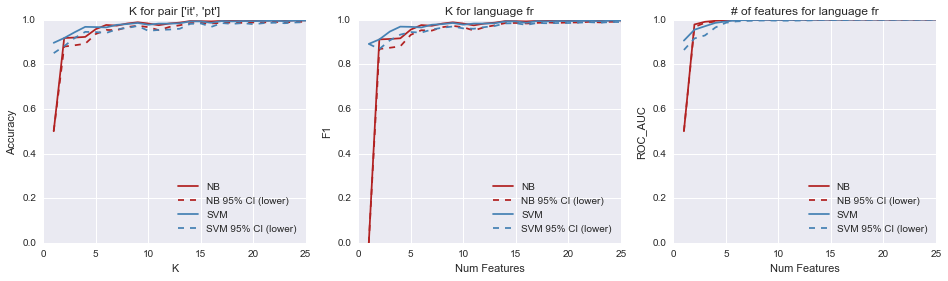

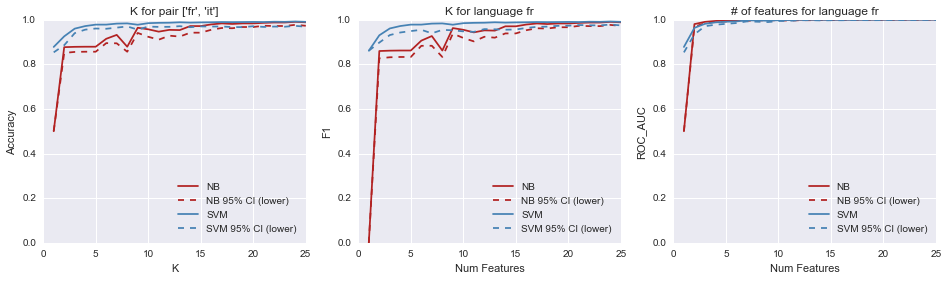

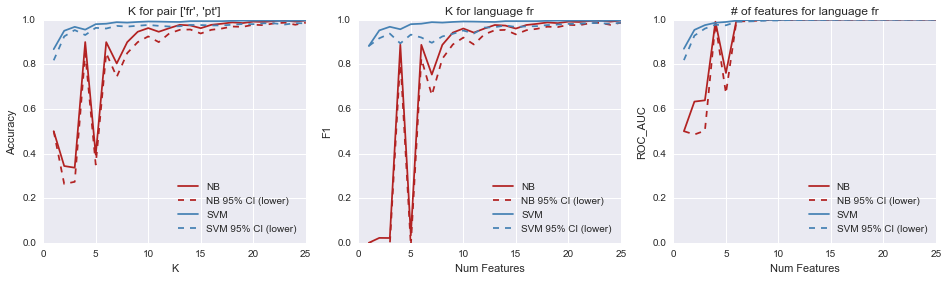

In [552]:
def experiment_9(corpi, languages, k, feature_sampling_perc=.10):
    
    # get whole corpus 
    corpus = skds.load_files(corpi['original'], encoding='UTF-8', shuffle=True, categories=languages)
    
    # Discover features by count
    X, X_t, y, y_t = train_test_split(corpus.data, corpus.target, train_size=feature_sampling_perc)
    vectorizer = CountVectorizer(analyzer='word', lowercase=True, encoding='UTF-8', token_pattern=token_pattern())
    X = vectorizer.fit_transform(X)
    
    # Feature selection
    selector = SelectKBest(chi2, k=k)
    selector.fit(X, y)
    indices = selector.get_support(indices=True)
    
    # Transform
    X = selector.transform(vectorizer.transform(corpus.data))
    y = corpus.target
    
    # Fit and evaluate a Naive Bayes Classifier
    classifier = MultinomialNB(fit_prior=True)
    scoring = ['accuracy','f1','roc_auc']
    nb_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
    
    # Fit and evaluate an SVM
    classifier = svm.SVC(kernel='rbf', C=1)
    svm_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
    
    # kernel=rbf (default)
    # decision function shape = ovo ( one-vs-rest) - original decision function in libsvm
    #  tol is the default 1e-3
    # default C = 1
    return {
        'k' : k,
        'features': [vectorizer.get_feature_names()[i] for i in indices],
        'NB' : {
            'accuracy' : nb_results['test_accuracy'].mean(),
            'accuracy_95CI': nb_results['test_accuracy'].std() * 2,
            'f1' : nb_results['test_f1'].mean(),
            'f1_95CI': nb_results['test_f1'].std() * 2,
            'auc' : nb_results['test_roc_auc'].mean(),
            'auc_95CI': nb_results['test_roc_auc'].std() * 2
        },
        'SVM' : {
            'accuracy': svm_results['test_accuracy'].mean(),
            'accuracy_95CI' : svm_results['test_accuracy'].std() * 2,
            'f1': svm_results['test_f1'].mean(),
            'f1_95CI': svm_results['test_f1'].std() * 2,
            'auc': svm_results['test_roc_auc'].mean(),
            'auc_95CI': svm_results['test_roc_auc'].std() * 2
        }
    }



for pair in [['it','pt'],['fr','it'],['fr','pt']]:
    
    # Run tests for a language
    print "----------------------------------"
    print "----------------------------------"
    print "Starting experiments for language pair: {0}".format(pair)
    results = []
    for k in range(1, 25+1):
        exp_res = experiment_9(lex_corpi, pair, k)

        print "----------------------------------"
        print "Results for (pair: {0}, k: {1})".format(pair, exp_res['k'])
        print "Features selected: {0}".format(exp_res['features'])
        print "Naive Bayes:"
        print "\tAccuracy {0}, +\/-95%CI {1}".format(exp_res['NB']['accuracy'], exp_res['NB']['accuracy_95CI'])
        print "\tF1 {0}, +\/-95%CI {1}".format(exp_res['NB']['f1'], exp_res['NB']['f1_95CI'])
        print "\tauc {0}, +\-95%CI {1}".format(exp_res['NB']['auc'],exp_res['NB']['auc_95CI'] )
        print "SVM:"
        print "\tAccuracy {0}, +\/-95%CI {1}".format(exp_res['SVM']['accuracy'], exp_res['SVM']['accuracy_95CI'])
        print "\tF1 {0}, +\/-95%CI {1}".format(exp_res['SVM']['f1'], exp_res['SVM']['f1_95CI'])
        print "\tauc {0}, +\-95%CI {1}".format(exp_res['SVM']['auc'],exp_res['SVM']['auc_95CI'] )
        results.append(exp_res)
            
    # Plotting NB
    figure = plt.figure(figsize=(16,4))
    k = [result['k'] for result in results]
    
    # Accuracy on NB, SVM
    axes = figure.add_subplot(1,3,1)
    axes.set_title("K for pair {0}".format(pair))
    # NB plot
    nb_acc = [result['NB']['accuracy'] for result in results]
    nb_acc_lower = [result['NB']['accuracy'] - result['NB']['accuracy_95CI'] for result in results]
    h1, = axes.plot(k, nb_acc, color='firebrick', label='NB')
    h2, = axes.plot(k, nb_acc_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_acc = [result['SVM']['accuracy'] for result in results]
    svm_acc_lower = [result['SVM']['accuracy'] - result['SVM']['accuracy_95CI'] for result in results]
    h3, = axes.plot(k, svm_acc, color='steelblue', label='SVM')
    h4, = axes.plot(k, svm_acc_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2,h3, h4], loc='lower right')
    axes.set_ylabel("Accuracy")
    axes.set_xlabel("K")
    axes.set_ylim([0,1])

    # F1 on NB, SVM
    axes = figure.add_subplot(1,3,2)
    axes.set_title("K for language {0}".format(language))
    # NB plot
    nb_f1 = [result['NB']['f1'] for result in results]
    nb_f1_lower = [result['NB']['f1'] - result['NB']['f1_95CI'] for result in results]
    h1, = axes.plot(k, nb_f1, color='firebrick', label='NB')
    h2, = axes.plot(k, nb_f1_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_f1 =[result['SVM']['f1'] for result in results]
    svm_f1_lower = [result['SVM']['f1'] - result['NB']['f1_95CI'] for result in results]
    h3, = axes.plot(k, svm_f1, color='steelblue', label='SVM')
    h4, = axes.plot(k, svm_f1_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2, h3, h4], loc='lower right')
    axes.set_ylabel("F1")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])
    
    # AUC on NB, SVM
    axes = figure.add_subplot(1,3,3)
    axes.set_title("# of features for language {0}".format(language))
    # NB plot
    nb_auc = [result['NB']['auc'] for result in results]
    nb_auc_lower = [result['NB']['auc'] - result['NB']['auc_95CI'] for result in results]
    h1, = axes.plot(k, nb_auc, color='firebrick', label='NB')
    h2, = axes.plot(k, nb_auc_lower, color='firebrick', linestyle='dashed', label='NB 95% CI (lower)')
    # SVM plot
    svm_auc = [result['SVM']['auc'] for result in results]
    svm_auc_lower = [result['SVM']['auc'] - result['SVM']['auc_95CI'] for result in results]
    h3, = axes.plot(k, svm_auc, color='steelblue', label='SVM')
    h4, = axes.plot(k, svm_auc_lower, color='steelblue', linestyle='dashed', label='SVM 95% CI (lower)')
    axes.legend(handles=[h1, h2, h3, h4], loc='lower right')
    axes.set_ylabel("ROC_AUC")
    axes.set_xlabel("Num Features")
    axes.set_ylim([0,1])

    
    print "Finished experiments for language {0}".format(language)

